In [1]:
import os
import torch
import random
import numpy as np
from collections import namedtuple, deque 
import math
import gym
from gym import logger,spaces
from sklearn import preprocessing
import matplotlib.pyplot as plt

from UAV_ENV.envs.DQNenv_T1 import DQNUAVenv_T1
from DQN_PyTorch_T1 import dqn_agent_T1
#from DQN import DQNagent
import seaborn as sns 
from mpl_toolkits import mplot3d

In [2]:
# registering the created environment in OpenAI gym : https://www.youtube.com/watch?v=kd4RrN-FTWY
# creating an environment object
#env=DQNUAVenv()
env= gym.make('DqnUavEnv-v3')
env.seed(0)
Observations=env.observation_space.shape[0]
#Observations_n=env.observation_space.n
Observation_shape=env.observation_space.shape
state=env.reset()
Actions_shape=env.action_space
Actions=env.action_space.n
print('Observation_space:',Observations)
#print('Observation_number:',Observations_n)
print('Observation_shape:',Observation_shape)
print('Action_space:',Actions_shape)
print('Action_number:', Actions)
print('Initial_state: ',state)
#env.path_plot()

(9,)
Observation_space: 9
Observation_shape: (9,)
Action_space: Discrete(48)
Action_number: 48
Initial_state:  [ 220  200   80  684  559    1 1216  835    1]


C:\Users\student\anaconda3\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment DqnUavEnv-v3 is out of date. You should consider upgrading to version `v5`.
  logger.warn(
C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [3]:
# creating DQN agent
seed=0
Agent_DQN=dqn_agent_T1(Observations,Actions,seed=0)
# creating DDPG agent
#Agent_DDPG=ddpg_agent(Observation_n,Action_dim)  # create environment object before calling

Input of net is:  9
Action size is:  48
Input of net is:  9
Action size is:  48


C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Episode 0 	 Reward: 16.46,	 Loss: 321122.06
Episode 2 	 Reward: 11.28,	 Loss: 240794.02
Episode 4 	 Reward: 6.34,	 Loss: 92902.77
Episode 6 	 Reward: 9.48,	 Loss: 24890.59
Episode 8 	 Reward: 8.25,	 Loss: 3423.80
Episode 10 	 Reward: 30.38,	 Loss: 654.87
Episode 12 	 Reward: 58.98,	 Loss: 440.45
Episode 14 	 Reward: 37.59,	 Loss: 465.38
Episode 16 	 Reward: 33.48,	 Loss: 439.55
Episode 18 	 Reward: 18.25,	 Loss: 394.73
Episode 20 	 Reward: 38.88,	 Loss: 356.83
Episode 22 	 Reward: 55.78,	 Loss: 331.25
Episode 24 	 Reward: 0.95,	 Loss: 294.39
Episode 26 	 Reward: 13.17,	 Loss: 272.42
Episode 28 	 Reward: 19.39,	 Loss: 254.75
Episode 30 	 Reward: 0.00,	 Loss: 236.18
Episode 32 	 Reward: 16.63,	 Loss: 243.78
Episode 34 	 Reward: 13.45,	 Loss: 227.23
Episode 36 	 Reward: 0.00,	 Loss: 203.46
Episode 38 	 Reward: 7.34,	 Loss: 200.84
Episode 40 	 Reward: 10.28,	 Loss: 185.51
Episode 42 	 Reward: 0.00,	 Loss: 175.21
Episode 44 	 Reward: 18.05,	 Loss: 172.43
Episode 46 	 Reward: 11.19,	 Loss: 1

Episode 396 	 Reward: 7.84,	 Loss: 26.66
Episode 398 	 Reward: 8.61,	 Loss: 35.91
Episode 400 	 Reward: 29.25,	 Loss: 27.90
Episode 402 	 Reward: 40.70,	 Loss: 37.09
Episode 404 	 Reward: 0.00,	 Loss: 27.87
Episode 406 	 Reward: 4.93,	 Loss: 34.58
Episode 408 	 Reward: 11.77,	 Loss: 28.78
Episode 410 	 Reward: 18.82,	 Loss: 29.53
Episode 412 	 Reward: 28.87,	 Loss: 24.39
Episode 414 	 Reward: 0.00,	 Loss: 30.67
Episode 416 	 Reward: 11.26,	 Loss: 27.23
Episode 418 	 Reward: 21.75,	 Loss: 33.07
Episode 420 	 Reward: 0.00,	 Loss: 30.83
Episode 422 	 Reward: 17.82,	 Loss: 33.32
Episode 424 	 Reward: 41.45,	 Loss: 29.91
Episode 426 	 Reward: 0.52,	 Loss: 27.90
Episode 428 	 Reward: 11.61,	 Loss: 34.80
Episode 430 	 Reward: 19.41,	 Loss: 32.93
Episode 432 	 Reward: 25.02,	 Loss: 25.97
Episode 434 	 Reward: 31.65,	 Loss: 31.04
Episode 436 	 Reward: 21.13,	 Loss: 25.71
Episode 438 	 Reward: 13.91,	 Loss: 27.56
Episode 440 	 Reward: 0.00,	 Loss: 26.37
Episode 442 	 Reward: 25.95,	 Loss: 28.67


Episode 790 	 Reward: 10.98,	 Loss: 28.76
Episode 792 	 Reward: 15.47,	 Loss: 35.26
Episode 794 	 Reward: 22.88,	 Loss: 36.26
Episode 796 	 Reward: 35.95,	 Loss: 34.68
Episode 798 	 Reward: 11.18,	 Loss: 35.26
Episode 800 	 Reward: 0.00,	 Loss: 32.42
Episode 802 	 Reward: 56.00,	 Loss: 36.60
Episode 804 	 Reward: 32.11,	 Loss: 34.79
Episode 806 	 Reward: 12.47,	 Loss: 37.89
Episode 808 	 Reward: 11.86,	 Loss: 25.49
Episode 810 	 Reward: 34.02,	 Loss: 38.02
Episode 812 	 Reward: 27.51,	 Loss: 37.38
Episode 814 	 Reward: 38.65,	 Loss: 37.25
Episode 816 	 Reward: 0.65,	 Loss: 36.64
Episode 818 	 Reward: 40.00,	 Loss: 37.63
Episode 820 	 Reward: 2.56,	 Loss: 28.84
Episode 822 	 Reward: 9.35,	 Loss: 34.93
Episode 824 	 Reward: 0.00,	 Loss: 30.75
Episode 826 	 Reward: 11.76,	 Loss: 34.94
Episode 828 	 Reward: 14.90,	 Loss: 37.92
Episode 830 	 Reward: 24.21,	 Loss: 32.06
Episode 832 	 Reward: 8.83,	 Loss: 33.84
Episode 834 	 Reward: 30.57,	 Loss: 39.50
Episode 836 	 Reward: 27.20,	 Loss: 31.1

Episode 1180 	 Reward: 10.53,	 Loss: 43.97
Episode 1182 	 Reward: 1.60,	 Loss: 35.16
Episode 1184 	 Reward: 5.78,	 Loss: 35.42
Episode 1186 	 Reward: 30.17,	 Loss: 39.88
Episode 1188 	 Reward: 34.23,	 Loss: 36.57
Episode 1190 	 Reward: 24.76,	 Loss: 34.52
Episode 1192 	 Reward: 4.29,	 Loss: 32.82
Episode 1194 	 Reward: 16.20,	 Loss: 32.00
Episode 1196 	 Reward: 0.00,	 Loss: 38.61
Episode 1198 	 Reward: 5.89,	 Loss: 37.52
Episode 1200 	 Reward: 16.24,	 Loss: 37.28
Episode 1202 	 Reward: 44.73,	 Loss: 35.19
Episode 1204 	 Reward: 21.80,	 Loss: 35.44
Episode 1206 	 Reward: 14.05,	 Loss: 37.49
Episode 1208 	 Reward: 0.00,	 Loss: 32.45
Episode 1210 	 Reward: 10.04,	 Loss: 45.66
Episode 1212 	 Reward: 20.17,	 Loss: 35.26
Episode 1214 	 Reward: 6.20,	 Loss: 32.07
Episode 1216 	 Reward: 31.68,	 Loss: 31.73
Episode 1218 	 Reward: 4.33,	 Loss: 35.30
Episode 1220 	 Reward: 2.38,	 Loss: 40.87
Episode 1222 	 Reward: 0.00,	 Loss: 32.62
Episode 1224 	 Reward: 26.40,	 Loss: 37.42
Episode 1226 	 Reward

Episode 1566 	 Reward: 9.00,	 Loss: 45.78
Episode 1568 	 Reward: 26.64,	 Loss: 44.38
Episode 1570 	 Reward: 29.62,	 Loss: 44.82
Episode 1572 	 Reward: 4.75,	 Loss: 45.12
Episode 1574 	 Reward: 43.71,	 Loss: 44.40
Episode 1576 	 Reward: 10.66,	 Loss: 41.94
Episode 1578 	 Reward: 0.00,	 Loss: 43.73
Episode 1580 	 Reward: 23.17,	 Loss: 42.38
Episode 1582 	 Reward: 21.79,	 Loss: 46.15
Episode 1584 	 Reward: 22.69,	 Loss: 45.59
Episode 1586 	 Reward: 0.76,	 Loss: 46.86
Episode 1588 	 Reward: 6.43,	 Loss: 50.47
Episode 1590 	 Reward: 22.41,	 Loss: 43.88
Episode 1592 	 Reward: 30.45,	 Loss: 48.94
Episode 1594 	 Reward: 12.58,	 Loss: 44.64
Episode 1596 	 Reward: 13.23,	 Loss: 50.59
Episode 1598 	 Reward: 0.00,	 Loss: 47.66
Episode 1600 	 Reward: 0.00,	 Loss: 48.21
Episode 1602 	 Reward: 34.78,	 Loss: 47.14
Episode 1604 	 Reward: 0.00,	 Loss: 46.09
Episode 1606 	 Reward: 19.00,	 Loss: 43.72
Episode 1608 	 Reward: 53.05,	 Loss: 45.81
Episode 1610 	 Reward: 0.46,	 Loss: 42.95
Episode 1612 	 Rewar

Episode 1952 	 Reward: 0.00,	 Loss: 56.37
Episode 1954 	 Reward: 23.93,	 Loss: 55.08
Episode 1956 	 Reward: 30.86,	 Loss: 62.73
Episode 1958 	 Reward: 21.42,	 Loss: 56.28
Episode 1960 	 Reward: 8.91,	 Loss: 63.24
Episode 1962 	 Reward: 8.28,	 Loss: 61.56
Episode 1964 	 Reward: 18.96,	 Loss: 58.56
Episode 1966 	 Reward: 0.00,	 Loss: 56.03
Episode 1968 	 Reward: 15.60,	 Loss: 59.54
Episode 1970 	 Reward: 28.44,	 Loss: 58.08
Episode 1972 	 Reward: 20.42,	 Loss: 57.77
Episode 1974 	 Reward: 42.98,	 Loss: 56.71
Episode 1976 	 Reward: 8.15,	 Loss: 54.81
Episode 1978 	 Reward: 20.04,	 Loss: 54.72
Episode 1980 	 Reward: 9.17,	 Loss: 56.77
Episode 1982 	 Reward: 10.28,	 Loss: 57.84
Episode 1984 	 Reward: 11.24,	 Loss: 55.34
Episode 1986 	 Reward: 3.88,	 Loss: 60.48
Episode 1988 	 Reward: 11.82,	 Loss: 54.20
Episode 1990 	 Reward: 29.17,	 Loss: 59.25
Episode 1992 	 Reward: 34.22,	 Loss: 57.81
Episode 1994 	 Reward: 22.20,	 Loss: 58.79
Episode 1996 	 Reward: 50.13,	 Loss: 57.64
Episode 1998 	 Rew

Episode 2336 	 Reward: 0.00,	 Loss: 73.45
Episode 2338 	 Reward: 8.37,	 Loss: 66.46
Episode 2340 	 Reward: 41.22,	 Loss: 78.00
Episode 2342 	 Reward: 58.88,	 Loss: 71.91
Episode 2344 	 Reward: 20.76,	 Loss: 76.87
Episode 2346 	 Reward: 36.18,	 Loss: 71.27
Episode 2348 	 Reward: 35.21,	 Loss: 77.44
Episode 2350 	 Reward: 46.52,	 Loss: 65.97
Episode 2352 	 Reward: 0.00,	 Loss: 71.14
Episode 2354 	 Reward: 27.78,	 Loss: 66.25
Episode 2356 	 Reward: 50.19,	 Loss: 68.53
Episode 2358 	 Reward: 0.00,	 Loss: 73.09
Episode 2360 	 Reward: 20.00,	 Loss: 73.27
Episode 2362 	 Reward: 42.31,	 Loss: 75.08
Episode 2364 	 Reward: 0.00,	 Loss: 73.65
Episode 2366 	 Reward: 26.89,	 Loss: 74.11
Episode 2368 	 Reward: 0.00,	 Loss: 68.24
Episode 2370 	 Reward: 26.04,	 Loss: 78.22
Episode 2372 	 Reward: 21.18,	 Loss: 72.55
Episode 2374 	 Reward: 24.03,	 Loss: 79.68
Episode 2376 	 Reward: 26.30,	 Loss: 72.04
Episode 2378 	 Reward: 1.91,	 Loss: 68.96
Episode 2380 	 Reward: 35.50,	 Loss: 70.49
Episode 2382 	 Rew

Episode 2722 	 Reward: 3.50,	 Loss: 77.47
Episode 2724 	 Reward: 33.80,	 Loss: 79.21
Episode 2726 	 Reward: 8.56,	 Loss: 74.71
Episode 2728 	 Reward: 25.83,	 Loss: 74.42
Episode 2730 	 Reward: 8.66,	 Loss: 79.55
Episode 2732 	 Reward: 5.59,	 Loss: 75.21
Episode 2734 	 Reward: 0.00,	 Loss: 75.91
Episode 2736 	 Reward: 5.00,	 Loss: 79.26
Episode 2738 	 Reward: 15.43,	 Loss: 73.24
Episode 2740 	 Reward: 13.00,	 Loss: 74.58
Episode 2742 	 Reward: 19.06,	 Loss: 74.26
Episode 2744 	 Reward: 13.77,	 Loss: 75.12
Episode 2746 	 Reward: 12.72,	 Loss: 74.32
Episode 2748 	 Reward: 21.50,	 Loss: 80.60
Episode 2750 	 Reward: 33.64,	 Loss: 73.25
Episode 2752 	 Reward: 18.36,	 Loss: 75.00
Episode 2754 	 Reward: 34.41,	 Loss: 76.95
Episode 2756 	 Reward: 20.69,	 Loss: 76.04
Episode 2758 	 Reward: 11.75,	 Loss: 76.22
Episode 2760 	 Reward: 5.92,	 Loss: 73.78
Episode 2762 	 Reward: 33.33,	 Loss: 77.76
Episode 2764 	 Reward: 66.46,	 Loss: 74.57
Episode 2766 	 Reward: 1.95,	 Loss: 74.58
Episode 2768 	 Rewa

Episode 3108 	 Reward: 42.29,	 Loss: 81.52
Episode 3110 	 Reward: 12.71,	 Loss: 81.67
Episode 3112 	 Reward: 0.00,	 Loss: 80.78
Episode 3114 	 Reward: 24.29,	 Loss: 83.77
Episode 3116 	 Reward: 1.36,	 Loss: 90.91
Episode 3118 	 Reward: 0.00,	 Loss: 85.48
Episode 3120 	 Reward: 23.32,	 Loss: 88.57
Episode 3122 	 Reward: 19.59,	 Loss: 84.64
Episode 3124 	 Reward: 0.00,	 Loss: 84.00
Episode 3126 	 Reward: 0.00,	 Loss: 88.45
Episode 3128 	 Reward: 2.63,	 Loss: 86.61
Episode 3130 	 Reward: 18.22,	 Loss: 87.76
Episode 3132 	 Reward: 23.57,	 Loss: 83.84
Episode 3134 	 Reward: 23.59,	 Loss: 82.83
Episode 3136 	 Reward: 0.00,	 Loss: 79.13
Episode 3138 	 Reward: 22.24,	 Loss: 82.37
Episode 3140 	 Reward: 3.79,	 Loss: 85.44
Episode 3142 	 Reward: 0.00,	 Loss: 89.87
Episode 3144 	 Reward: 3.58,	 Loss: 87.10
Episode 3146 	 Reward: 19.41,	 Loss: 89.79
Episode 3148 	 Reward: 28.38,	 Loss: 86.60
Episode 3150 	 Reward: 3.16,	 Loss: 83.93
Episode 3152 	 Reward: 10.11,	 Loss: 88.55
Episode 3154 	 Reward:

Episode 3492 	 Reward: 30.36,	 Loss: 109.50
Episode 3494 	 Reward: 36.89,	 Loss: 109.04
Episode 3496 	 Reward: 0.00,	 Loss: 111.82
Episode 3498 	 Reward: 22.82,	 Loss: 109.29
Episode 3500 	 Reward: 18.43,	 Loss: 110.33
Episode 3502 	 Reward: 0.00,	 Loss: 105.85
Episode 3504 	 Reward: 41.32,	 Loss: 110.00
Episode 3506 	 Reward: 18.26,	 Loss: 105.94
Episode 3508 	 Reward: 11.20,	 Loss: 105.88
Episode 3510 	 Reward: 9.99,	 Loss: 108.27
Episode 3512 	 Reward: 27.05,	 Loss: 108.35
Episode 3514 	 Reward: 4.67,	 Loss: 107.32
Episode 3516 	 Reward: 46.16,	 Loss: 112.53
Episode 3518 	 Reward: 16.72,	 Loss: 115.04
Episode 3520 	 Reward: 30.18,	 Loss: 107.20
Episode 3522 	 Reward: 33.24,	 Loss: 115.19
Episode 3524 	 Reward: 4.44,	 Loss: 107.72
Episode 3526 	 Reward: 48.47,	 Loss: 113.47
Episode 3528 	 Reward: 28.40,	 Loss: 118.15
Episode 3530 	 Reward: 3.86,	 Loss: 119.30
Episode 3532 	 Reward: 26.92,	 Loss: 107.67
Episode 3534 	 Reward: 46.75,	 Loss: 118.79
Episode 3536 	 Reward: 7.92,	 Loss: 11

Episode 3870 	 Reward: 28.64,	 Loss: 165.72
Episode 3872 	 Reward: 18.77,	 Loss: 182.04
Episode 3874 	 Reward: 5.69,	 Loss: 183.08
Episode 3876 	 Reward: 9.90,	 Loss: 180.48
Episode 3878 	 Reward: 39.59,	 Loss: 178.71
Episode 3880 	 Reward: 13.30,	 Loss: 179.21
Episode 3882 	 Reward: 0.00,	 Loss: 176.75
Episode 3884 	 Reward: 4.37,	 Loss: 189.95
Episode 3886 	 Reward: 0.00,	 Loss: 176.71
Episode 3888 	 Reward: 17.03,	 Loss: 184.51
Episode 3890 	 Reward: 45.03,	 Loss: 190.33
Episode 3892 	 Reward: 25.06,	 Loss: 177.99
Episode 3894 	 Reward: 1.88,	 Loss: 179.41
Episode 3896 	 Reward: 7.11,	 Loss: 187.40
Episode 3898 	 Reward: 17.25,	 Loss: 179.06
Episode 3900 	 Reward: 2.52,	 Loss: 175.24
Episode 3902 	 Reward: 15.19,	 Loss: 177.83
Episode 3904 	 Reward: 0.00,	 Loss: 193.42
Episode 3906 	 Reward: 14.05,	 Loss: 180.27
Episode 3908 	 Reward: 10.02,	 Loss: 194.36
Episode 3910 	 Reward: 18.93,	 Loss: 184.10
Episode 3912 	 Reward: 0.00,	 Loss: 192.86
Episode 3914 	 Reward: 0.86,	 Loss: 191.93

Episode 4246 	 Reward: 0.00,	 Loss: 240.72
Episode 4248 	 Reward: 27.08,	 Loss: 231.74
Episode 4250 	 Reward: 15.71,	 Loss: 234.63
Episode 4252 	 Reward: 2.99,	 Loss: 245.51
Episode 4254 	 Reward: 9.03,	 Loss: 241.50
Episode 4256 	 Reward: 48.77,	 Loss: 238.66
Episode 4258 	 Reward: 52.59,	 Loss: 238.00
Episode 4260 	 Reward: 0.00,	 Loss: 247.40
Episode 4262 	 Reward: 0.00,	 Loss: 256.03
Episode 4264 	 Reward: 7.83,	 Loss: 255.51
Episode 4266 	 Reward: 0.84,	 Loss: 249.74
Episode 4268 	 Reward: 0.00,	 Loss: 246.80
Episode 4270 	 Reward: 18.67,	 Loss: 246.29
Episode 4272 	 Reward: 12.84,	 Loss: 239.98
Episode 4274 	 Reward: 29.56,	 Loss: 253.31
Episode 4276 	 Reward: 29.64,	 Loss: 253.01
Episode 4278 	 Reward: 10.58,	 Loss: 250.87
Episode 4280 	 Reward: 18.72,	 Loss: 242.88
Episode 4282 	 Reward: 29.46,	 Loss: 238.83
Episode 4284 	 Reward: 13.73,	 Loss: 235.79
Episode 4286 	 Reward: 30.41,	 Loss: 243.50
Episode 4288 	 Reward: 7.48,	 Loss: 259.59
Episode 4290 	 Reward: 2.33,	 Loss: 260.0

Episode 4622 	 Reward: 16.12,	 Loss: 152.26
Episode 4624 	 Reward: 40.63,	 Loss: 155.36
Episode 4626 	 Reward: 7.69,	 Loss: 162.22
Episode 4628 	 Reward: 16.92,	 Loss: 150.79
Episode 4630 	 Reward: 1.76,	 Loss: 144.11
Episode 4632 	 Reward: 44.16,	 Loss: 155.14
Episode 4634 	 Reward: 1.07,	 Loss: 150.33
Episode 4636 	 Reward: 27.53,	 Loss: 147.99
Episode 4638 	 Reward: 13.54,	 Loss: 156.69
Episode 4640 	 Reward: 18.35,	 Loss: 153.93
Episode 4642 	 Reward: 25.61,	 Loss: 147.34
Episode 4644 	 Reward: 14.36,	 Loss: 143.16
Episode 4646 	 Reward: 12.58,	 Loss: 152.52
Episode 4648 	 Reward: 0.00,	 Loss: 138.23
Episode 4650 	 Reward: 17.96,	 Loss: 146.43
Episode 4652 	 Reward: 0.00,	 Loss: 140.36
Episode 4654 	 Reward: 0.00,	 Loss: 141.95
Episode 4656 	 Reward: 6.17,	 Loss: 140.82
Episode 4658 	 Reward: 2.08,	 Loss: 139.84
Episode 4660 	 Reward: 2.58,	 Loss: 144.86
Episode 4662 	 Reward: 22.53,	 Loss: 143.26
Episode 4664 	 Reward: 1.35,	 Loss: 136.60
Episode 4666 	 Reward: 20.54,	 Loss: 138.2

Episode 4998 	 Reward: 0.00,	 Loss: 115.21
Episode 5000 	 Reward: 20.09,	 Loss: 118.12
Episode 5002 	 Reward: 7.00,	 Loss: 115.71
Episode 5004 	 Reward: 16.13,	 Loss: 115.69
Episode 5006 	 Reward: 30.67,	 Loss: 120.27
Episode 5008 	 Reward: 6.71,	 Loss: 120.23
Episode 5010 	 Reward: 0.00,	 Loss: 122.64
Episode 5012 	 Reward: 2.04,	 Loss: 124.73
Episode 5014 	 Reward: 30.09,	 Loss: 115.09
Episode 5016 	 Reward: 2.36,	 Loss: 123.27
Episode 5018 	 Reward: 21.27,	 Loss: 120.21
Episode 5020 	 Reward: 27.16,	 Loss: 127.84
Episode 5022 	 Reward: 0.00,	 Loss: 122.62
Episode 5024 	 Reward: 0.00,	 Loss: 118.21
Episode 5026 	 Reward: 3.99,	 Loss: 122.02
Episode 5028 	 Reward: 17.24,	 Loss: 116.35
Episode 5030 	 Reward: 26.92,	 Loss: 114.92
Episode 5032 	 Reward: 21.19,	 Loss: 118.87
Episode 5034 	 Reward: 25.72,	 Loss: 127.54
Episode 5036 	 Reward: 1.76,	 Loss: 124.54
Episode 5038 	 Reward: 30.92,	 Loss: 119.97
Episode 5040 	 Reward: 0.00,	 Loss: 119.59
Episode 5042 	 Reward: 0.00,	 Loss: 114.43


Episode 5374 	 Reward: 44.48,	 Loss: 148.67
Episode 5376 	 Reward: 52.76,	 Loss: 140.35
Episode 5378 	 Reward: 10.98,	 Loss: 140.14
Episode 5380 	 Reward: 18.13,	 Loss: 142.82
Episode 5382 	 Reward: 8.90,	 Loss: 137.74
Episode 5384 	 Reward: 46.64,	 Loss: 143.50
Episode 5386 	 Reward: 17.71,	 Loss: 143.46
Episode 5388 	 Reward: 21.96,	 Loss: 151.84
Episode 5390 	 Reward: 8.15,	 Loss: 148.49
Episode 5392 	 Reward: 18.95,	 Loss: 154.01
Episode 5394 	 Reward: 3.11,	 Loss: 147.62
Episode 5396 	 Reward: 12.90,	 Loss: 144.37
Episode 5398 	 Reward: 49.24,	 Loss: 147.10
Episode 5400 	 Reward: 4.41,	 Loss: 136.77
Episode 5402 	 Reward: 14.14,	 Loss: 150.08
Episode 5404 	 Reward: 47.12,	 Loss: 141.26
Episode 5406 	 Reward: 4.95,	 Loss: 139.13
Episode 5408 	 Reward: 0.00,	 Loss: 146.93
Episode 5410 	 Reward: 19.00,	 Loss: 143.01
Episode 5412 	 Reward: 0.00,	 Loss: 150.05
Episode 5414 	 Reward: 47.77,	 Loss: 150.89
Episode 5416 	 Reward: 8.66,	 Loss: 143.68
Episode 5418 	 Reward: 42.73,	 Loss: 150

Episode 5752 	 Reward: 15.19,	 Loss: 162.55
Episode 5754 	 Reward: 0.00,	 Loss: 165.62
Episode 5756 	 Reward: 13.55,	 Loss: 157.34
Episode 5758 	 Reward: 0.90,	 Loss: 158.38
Episode 5760 	 Reward: 2.49,	 Loss: 158.19
Episode 5762 	 Reward: 2.30,	 Loss: 165.23
Episode 5764 	 Reward: 18.91,	 Loss: 158.87
Episode 5766 	 Reward: 12.04,	 Loss: 157.47
Episode 5768 	 Reward: 17.08,	 Loss: 152.56
Episode 5770 	 Reward: 10.31,	 Loss: 173.95
Episode 5772 	 Reward: 11.08,	 Loss: 154.12
Episode 5774 	 Reward: 13.26,	 Loss: 165.96
Episode 5776 	 Reward: 22.27,	 Loss: 165.27
Episode 5778 	 Reward: 0.00,	 Loss: 161.68
Episode 5780 	 Reward: 27.37,	 Loss: 164.76
Episode 5782 	 Reward: 14.55,	 Loss: 162.35
Episode 5784 	 Reward: 0.00,	 Loss: 165.82
Episode 5786 	 Reward: 15.79,	 Loss: 150.26
Episode 5788 	 Reward: 0.00,	 Loss: 160.41
Episode 5790 	 Reward: 32.73,	 Loss: 165.72
Episode 5792 	 Reward: 24.14,	 Loss: 157.99
Episode 5794 	 Reward: 19.94,	 Loss: 156.26
Episode 5796 	 Reward: 8.84,	 Loss: 158

Episode 6130 	 Reward: 0.00,	 Loss: 153.82
Episode 6132 	 Reward: 9.29,	 Loss: 145.81
Episode 6134 	 Reward: 27.15,	 Loss: 156.52
Episode 6136 	 Reward: 2.44,	 Loss: 156.24
Episode 6138 	 Reward: 41.07,	 Loss: 154.48
Episode 6140 	 Reward: 6.99,	 Loss: 155.16
Episode 6142 	 Reward: 10.82,	 Loss: 150.81
Episode 6144 	 Reward: 0.00,	 Loss: 154.77
Episode 6146 	 Reward: 12.76,	 Loss: 154.69
Episode 6148 	 Reward: 5.10,	 Loss: 153.32
Episode 6150 	 Reward: 1.79,	 Loss: 146.41
Episode 6152 	 Reward: 15.19,	 Loss: 148.42
Episode 6154 	 Reward: 18.78,	 Loss: 150.76
Episode 6156 	 Reward: 26.16,	 Loss: 158.89
Episode 6158 	 Reward: 13.36,	 Loss: 154.13
Episode 6160 	 Reward: 0.00,	 Loss: 151.88
Episode 6162 	 Reward: 40.00,	 Loss: 155.01
Episode 6164 	 Reward: 0.00,	 Loss: 157.12
Episode 6166 	 Reward: 11.91,	 Loss: 158.73
Episode 6168 	 Reward: 10.83,	 Loss: 153.35
Episode 6170 	 Reward: 3.16,	 Loss: 149.56
Episode 6172 	 Reward: 26.81,	 Loss: 152.44
Episode 6174 	 Reward: 16.52,	 Loss: 150.7

Episode 6508 	 Reward: 30.27,	 Loss: 145.57
Episode 6510 	 Reward: 10.17,	 Loss: 147.19
Episode 6512 	 Reward: 0.00,	 Loss: 144.84
Episode 6514 	 Reward: 5.15,	 Loss: 149.45
Episode 6516 	 Reward: 14.09,	 Loss: 148.23
Episode 6518 	 Reward: 0.00,	 Loss: 153.38
Episode 6520 	 Reward: 44.03,	 Loss: 150.24
Episode 6522 	 Reward: 0.00,	 Loss: 149.34
Episode 6524 	 Reward: 11.53,	 Loss: 149.17
Episode 6526 	 Reward: 0.00,	 Loss: 151.80
Episode 6528 	 Reward: 44.55,	 Loss: 156.60
Episode 6530 	 Reward: 4.03,	 Loss: 158.30
Episode 6532 	 Reward: 22.50,	 Loss: 152.68
Episode 6534 	 Reward: 13.45,	 Loss: 153.12
Episode 6536 	 Reward: 26.56,	 Loss: 149.15
Episode 6538 	 Reward: 11.06,	 Loss: 151.20
Episode 6540 	 Reward: 1.79,	 Loss: 156.62
Episode 6542 	 Reward: 15.77,	 Loss: 152.42
Episode 6544 	 Reward: 24.39,	 Loss: 159.25
Episode 6546 	 Reward: 0.00,	 Loss: 152.05
Episode 6548 	 Reward: 15.03,	 Loss: 149.50
Episode 6550 	 Reward: 38.20,	 Loss: 154.09
Episode 6552 	 Reward: 21.61,	 Loss: 152

Episode 6884 	 Reward: 0.00,	 Loss: 144.51
Episode 6886 	 Reward: 6.39,	 Loss: 142.35
Episode 6888 	 Reward: 45.70,	 Loss: 139.96
Episode 6890 	 Reward: 18.33,	 Loss: 140.52
Episode 6892 	 Reward: 0.00,	 Loss: 142.57
Episode 6894 	 Reward: 32.07,	 Loss: 134.38
Episode 6896 	 Reward: 0.00,	 Loss: 139.51
Episode 6898 	 Reward: 0.00,	 Loss: 135.09
Episode 6900 	 Reward: 18.06,	 Loss: 133.94
Episode 6902 	 Reward: 56.84,	 Loss: 141.64
Episode 6904 	 Reward: 0.00,	 Loss: 141.97
Episode 6906 	 Reward: 14.58,	 Loss: 138.65
Episode 6908 	 Reward: 17.62,	 Loss: 138.93
Episode 6910 	 Reward: 16.64,	 Loss: 140.20
Episode 6912 	 Reward: 43.48,	 Loss: 138.54
Episode 6914 	 Reward: 0.00,	 Loss: 143.58
Episode 6916 	 Reward: 6.00,	 Loss: 137.77
Episode 6918 	 Reward: 7.23,	 Loss: 136.81
Episode 6920 	 Reward: 17.07,	 Loss: 130.57
Episode 6922 	 Reward: 3.27,	 Loss: 138.29
Episode 6924 	 Reward: 45.03,	 Loss: 138.30
Episode 6926 	 Reward: 33.06,	 Loss: 140.98
Episode 6928 	 Reward: 6.09,	 Loss: 136.93

Episode 7260 	 Reward: 9.37,	 Loss: 105.15
Episode 7262 	 Reward: 14.90,	 Loss: 104.55
Episode 7264 	 Reward: 23.86,	 Loss: 93.86
Episode 7266 	 Reward: 17.29,	 Loss: 95.83
Episode 7268 	 Reward: 12.67,	 Loss: 91.47
Episode 7270 	 Reward: 26.26,	 Loss: 100.39
Episode 7272 	 Reward: 40.72,	 Loss: 98.31
Episode 7274 	 Reward: 18.77,	 Loss: 92.68
Episode 7276 	 Reward: 28.95,	 Loss: 109.40
Episode 7278 	 Reward: 32.47,	 Loss: 101.54
Episode 7280 	 Reward: 26.75,	 Loss: 99.90
Episode 7282 	 Reward: 1.26,	 Loss: 98.26
Episode 7284 	 Reward: 24.98,	 Loss: 98.24
Episode 7286 	 Reward: 8.06,	 Loss: 96.25
Episode 7288 	 Reward: 56.27,	 Loss: 95.31
Episode 7290 	 Reward: 51.48,	 Loss: 94.42
Episode 7292 	 Reward: 9.55,	 Loss: 95.92
Episode 7294 	 Reward: 21.29,	 Loss: 95.96
Episode 7296 	 Reward: 2.26,	 Loss: 98.27
Episode 7298 	 Reward: 0.00,	 Loss: 88.31
Episode 7300 	 Reward: 59.79,	 Loss: 95.74
Episode 7302 	 Reward: 0.00,	 Loss: 93.59
Episode 7304 	 Reward: 13.72,	 Loss: 99.07
Episode 7306 

Episode 7646 	 Reward: 0.00,	 Loss: 92.13
Episode 7648 	 Reward: 13.02,	 Loss: 91.06
Episode 7650 	 Reward: 32.11,	 Loss: 95.80
Episode 7652 	 Reward: 4.63,	 Loss: 95.15
Episode 7654 	 Reward: 31.30,	 Loss: 90.94
Episode 7656 	 Reward: 31.15,	 Loss: 94.98
Episode 7658 	 Reward: 4.83,	 Loss: 96.37
Episode 7660 	 Reward: 15.74,	 Loss: 88.82
Episode 7662 	 Reward: 24.10,	 Loss: 94.29
Episode 7664 	 Reward: 1.06,	 Loss: 90.97
Episode 7666 	 Reward: 17.17,	 Loss: 88.83
Episode 7668 	 Reward: 27.14,	 Loss: 92.47
Episode 7670 	 Reward: 5.81,	 Loss: 91.87
Episode 7672 	 Reward: 41.84,	 Loss: 95.44
Episode 7674 	 Reward: 35.15,	 Loss: 98.64
Episode 7676 	 Reward: 0.47,	 Loss: 88.89
Episode 7678 	 Reward: 4.56,	 Loss: 91.95
Episode 7680 	 Reward: 26.10,	 Loss: 90.73
Episode 7682 	 Reward: 17.20,	 Loss: 99.92
Episode 7684 	 Reward: 0.92,	 Loss: 95.65
Episode 7686 	 Reward: 12.89,	 Loss: 88.01
Episode 7688 	 Reward: 0.00,	 Loss: 91.56
Episode 7690 	 Reward: 21.75,	 Loss: 88.90
Episode 7692 	 Rewar

Episode 8032 	 Reward: 29.74,	 Loss: 85.23
Episode 8034 	 Reward: 22.74,	 Loss: 89.50
Episode 8036 	 Reward: 5.42,	 Loss: 85.85
Episode 8038 	 Reward: 9.39,	 Loss: 84.58
Episode 8040 	 Reward: 4.08,	 Loss: 91.18
Episode 8042 	 Reward: 23.57,	 Loss: 95.65
Episode 8044 	 Reward: 20.94,	 Loss: 87.97
Episode 8046 	 Reward: 0.00,	 Loss: 92.52
Episode 8048 	 Reward: 24.58,	 Loss: 91.96
Episode 8050 	 Reward: 3.74,	 Loss: 85.34
Episode 8052 	 Reward: 36.59,	 Loss: 91.22
Episode 8054 	 Reward: 15.48,	 Loss: 87.59
Episode 8056 	 Reward: 15.85,	 Loss: 90.15
Episode 8058 	 Reward: 18.11,	 Loss: 93.73
Episode 8060 	 Reward: 16.32,	 Loss: 87.12
Episode 8062 	 Reward: 1.41,	 Loss: 82.55
Episode 8064 	 Reward: 23.32,	 Loss: 87.40
Episode 8066 	 Reward: 0.00,	 Loss: 96.13
Episode 8068 	 Reward: 36.02,	 Loss: 86.75
Episode 8070 	 Reward: 34.27,	 Loss: 93.54
Episode 8072 	 Reward: 1.16,	 Loss: 89.12
Episode 8074 	 Reward: 25.30,	 Loss: 83.86
Episode 8076 	 Reward: 0.00,	 Loss: 90.21
Episode 8078 	 Rewar

Episode 8418 	 Reward: 2.83,	 Loss: 88.65
Episode 8420 	 Reward: 20.40,	 Loss: 97.60
Episode 8422 	 Reward: 19.12,	 Loss: 88.66
Episode 8424 	 Reward: 2.21,	 Loss: 93.58
Episode 8426 	 Reward: 28.15,	 Loss: 87.34
Episode 8428 	 Reward: 7.60,	 Loss: 90.95
Episode 8430 	 Reward: 2.84,	 Loss: 90.84
Episode 8432 	 Reward: 67.27,	 Loss: 90.88
Episode 8434 	 Reward: 11.90,	 Loss: 90.03
Episode 8436 	 Reward: 20.53,	 Loss: 91.37
Episode 8438 	 Reward: 13.96,	 Loss: 93.40
Episode 8440 	 Reward: 0.00,	 Loss: 99.69
Episode 8442 	 Reward: 2.75,	 Loss: 91.92
Episode 8444 	 Reward: 23.51,	 Loss: 87.74
Episode 8446 	 Reward: 16.39,	 Loss: 89.24
Episode 8448 	 Reward: 31.36,	 Loss: 87.89
Episode 8450 	 Reward: 0.00,	 Loss: 87.30
Episode 8452 	 Reward: 3.79,	 Loss: 93.09
Episode 8454 	 Reward: 0.00,	 Loss: 87.39
Episode 8456 	 Reward: 39.02,	 Loss: 86.53
Episode 8458 	 Reward: 25.99,	 Loss: 86.99
Episode 8460 	 Reward: 8.87,	 Loss: 84.98
Episode 8462 	 Reward: 8.05,	 Loss: 89.45
Episode 8464 	 Reward:

Episode 8804 	 Reward: 31.86,	 Loss: 85.56
Episode 8806 	 Reward: 10.28,	 Loss: 85.45
Episode 8808 	 Reward: 10.31,	 Loss: 86.82
Episode 8810 	 Reward: 36.06,	 Loss: 82.25
Episode 8812 	 Reward: 28.94,	 Loss: 84.16
Episode 8814 	 Reward: 4.61,	 Loss: 81.92
Episode 8816 	 Reward: 11.75,	 Loss: 85.29
Episode 8818 	 Reward: 11.69,	 Loss: 81.74
Episode 8820 	 Reward: 7.45,	 Loss: 82.31
Episode 8822 	 Reward: 28.60,	 Loss: 84.19
Episode 8824 	 Reward: 18.60,	 Loss: 81.44
Episode 8826 	 Reward: 34.16,	 Loss: 80.18
Episode 8828 	 Reward: 38.59,	 Loss: 80.96
Episode 8830 	 Reward: 16.08,	 Loss: 82.24
Episode 8832 	 Reward: 0.46,	 Loss: 92.92
Episode 8834 	 Reward: 6.29,	 Loss: 83.10
Episode 8836 	 Reward: 1.86,	 Loss: 82.04
Episode 8838 	 Reward: 7.26,	 Loss: 82.07
Episode 8840 	 Reward: 1.26,	 Loss: 85.52
Episode 8842 	 Reward: 4.00,	 Loss: 81.53
Episode 8844 	 Reward: 45.98,	 Loss: 84.13
Episode 8846 	 Reward: 4.94,	 Loss: 80.71
Episode 8848 	 Reward: 21.06,	 Loss: 85.22
Episode 8850 	 Rewar

Episode 9190 	 Reward: 3.89,	 Loss: 84.04
Episode 9192 	 Reward: 10.04,	 Loss: 84.72
Episode 9194 	 Reward: 14.52,	 Loss: 93.08
Episode 9196 	 Reward: 6.65,	 Loss: 78.40
Episode 9198 	 Reward: 3.22,	 Loss: 79.23
Episode 9200 	 Reward: 1.65,	 Loss: 80.99
Episode 9202 	 Reward: 3.62,	 Loss: 85.20
Episode 9204 	 Reward: 58.88,	 Loss: 79.66
Episode 9206 	 Reward: 10.41,	 Loss: 79.85
Episode 9208 	 Reward: 0.00,	 Loss: 77.74
Episode 9210 	 Reward: 2.68,	 Loss: 76.54
Episode 9212 	 Reward: 20.95,	 Loss: 80.79
Episode 9214 	 Reward: 26.07,	 Loss: 80.91
Episode 9216 	 Reward: 28.25,	 Loss: 81.55
Episode 9218 	 Reward: 5.63,	 Loss: 77.75
Episode 9220 	 Reward: 3.96,	 Loss: 77.53
Episode 9222 	 Reward: 47.05,	 Loss: 81.47
Episode 9224 	 Reward: 13.50,	 Loss: 80.35
Episode 9226 	 Reward: 0.00,	 Loss: 77.56
Episode 9228 	 Reward: 22.51,	 Loss: 72.79
Episode 9230 	 Reward: 25.25,	 Loss: 78.55
Episode 9232 	 Reward: 0.00,	 Loss: 80.00
Episode 9234 	 Reward: 1.73,	 Loss: 82.60
Episode 9236 	 Reward: 

Episode 9576 	 Reward: 14.95,	 Loss: 76.82
Episode 9578 	 Reward: 8.63,	 Loss: 78.40
Episode 9580 	 Reward: 41.68,	 Loss: 74.32
Episode 9582 	 Reward: 28.58,	 Loss: 77.90
Episode 9584 	 Reward: 19.90,	 Loss: 72.25
Episode 9586 	 Reward: 0.00,	 Loss: 76.31
Episode 9588 	 Reward: 6.48,	 Loss: 80.14
Episode 9590 	 Reward: 19.76,	 Loss: 74.84
Episode 9592 	 Reward: 41.05,	 Loss: 78.72
Episode 9594 	 Reward: 18.63,	 Loss: 75.31
Episode 9596 	 Reward: 39.76,	 Loss: 73.12
Episode 9598 	 Reward: 0.00,	 Loss: 76.14
Episode 9600 	 Reward: 25.28,	 Loss: 80.58
Episode 9602 	 Reward: 0.00,	 Loss: 76.15
Episode 9604 	 Reward: 37.48,	 Loss: 72.44
Episode 9606 	 Reward: 28.10,	 Loss: 78.19
Episode 9608 	 Reward: 4.86,	 Loss: 80.26
Episode 9610 	 Reward: 4.77,	 Loss: 73.83
Episode 9612 	 Reward: 0.00,	 Loss: 75.34
Episode 9614 	 Reward: 22.98,	 Loss: 73.14
Episode 9616 	 Reward: 21.79,	 Loss: 69.57
Episode 9618 	 Reward: 31.83,	 Loss: 77.12
Episode 9620 	 Reward: 0.00,	 Loss: 77.62
Episode 9622 	 Rewar

Episode 9962 	 Reward: 29.51,	 Loss: 69.69
Episode 9964 	 Reward: 18.51,	 Loss: 74.83
Episode 9966 	 Reward: 29.41,	 Loss: 67.08
Episode 9968 	 Reward: 36.60,	 Loss: 74.23
Episode 9970 	 Reward: 37.79,	 Loss: 67.92
Episode 9972 	 Reward: 26.68,	 Loss: 71.44
Episode 9974 	 Reward: 19.78,	 Loss: 67.01
Episode 9976 	 Reward: 18.35,	 Loss: 74.22
Episode 9978 	 Reward: 14.60,	 Loss: 68.17
Episode 9980 	 Reward: 0.00,	 Loss: 74.27
Episode 9982 	 Reward: 3.60,	 Loss: 69.19
Episode 9984 	 Reward: 3.51,	 Loss: 67.90
Episode 9986 	 Reward: 15.94,	 Loss: 68.97
Episode 9988 	 Reward: 21.39,	 Loss: 69.64
Episode 9990 	 Reward: 0.00,	 Loss: 67.56
Episode 9992 	 Reward: 5.99,	 Loss: 66.34
Episode 9994 	 Reward: 6.23,	 Loss: 66.04
Episode 9996 	 Reward: 13.83,	 Loss: 72.34
Episode 9998 	 Reward: 3.10,	 Loss: 67.84
Episode 10000 	 Reward: 29.77,	 Loss: 66.50
Episode 10002 	 Reward: 1.80,	 Loss: 69.01
Episode 10004 	 Reward: 0.00,	 Loss: 68.85
Episode 10006 	 Reward: 14.80,	 Loss: 68.71
Episode 10008 	 

Episode 10340 	 Reward: 0.00,	 Loss: 73.87
Episode 10342 	 Reward: 2.46,	 Loss: 68.19
Episode 10344 	 Reward: 0.00,	 Loss: 66.58
Episode 10346 	 Reward: 42.99,	 Loss: 76.97
Episode 10348 	 Reward: 13.25,	 Loss: 67.78
Episode 10350 	 Reward: 16.46,	 Loss: 64.60
Episode 10352 	 Reward: 46.07,	 Loss: 74.29
Episode 10354 	 Reward: 28.93,	 Loss: 71.72
Episode 10356 	 Reward: 28.98,	 Loss: 69.35
Episode 10358 	 Reward: 9.64,	 Loss: 68.93
Episode 10360 	 Reward: 0.61,	 Loss: 70.40
Episode 10362 	 Reward: 12.02,	 Loss: 66.29
Episode 10364 	 Reward: 6.10,	 Loss: 71.57
Episode 10366 	 Reward: 0.00,	 Loss: 70.48
Episode 10368 	 Reward: 12.34,	 Loss: 70.36
Episode 10370 	 Reward: 0.00,	 Loss: 72.29
Episode 10372 	 Reward: 21.63,	 Loss: 67.53
Episode 10374 	 Reward: 20.19,	 Loss: 72.86
Episode 10376 	 Reward: 20.40,	 Loss: 70.62
Episode 10378 	 Reward: 0.00,	 Loss: 70.24
Episode 10380 	 Reward: 6.92,	 Loss: 67.17
Episode 10382 	 Reward: 9.80,	 Loss: 72.50
Episode 10384 	 Reward: 1.42,	 Loss: 69.36


Episode 10716 	 Reward: 0.52,	 Loss: 71.43
Episode 10718 	 Reward: 4.00,	 Loss: 70.41
Episode 10720 	 Reward: 29.95,	 Loss: 68.76
Episode 10722 	 Reward: 0.00,	 Loss: 70.55
Episode 10724 	 Reward: 20.40,	 Loss: 77.37
Episode 10726 	 Reward: 13.37,	 Loss: 74.28
Episode 10728 	 Reward: 20.09,	 Loss: 75.26
Episode 10730 	 Reward: 1.79,	 Loss: 70.36
Episode 10732 	 Reward: 2.03,	 Loss: 82.20
Episode 10734 	 Reward: 7.31,	 Loss: 70.03
Episode 10736 	 Reward: 18.61,	 Loss: 70.09
Episode 10738 	 Reward: 27.85,	 Loss: 69.41
Episode 10740 	 Reward: 0.00,	 Loss: 68.33
Episode 10742 	 Reward: 11.51,	 Loss: 71.46
Episode 10744 	 Reward: 10.03,	 Loss: 68.31
Episode 10746 	 Reward: 11.74,	 Loss: 74.38
Episode 10748 	 Reward: 7.47,	 Loss: 77.36
Episode 10750 	 Reward: 3.31,	 Loss: 71.24
Episode 10752 	 Reward: 6.84,	 Loss: 74.40
Episode 10754 	 Reward: 0.00,	 Loss: 76.93
Episode 10756 	 Reward: 13.89,	 Loss: 70.74
Episode 10758 	 Reward: 5.50,	 Loss: 70.17
Episode 10760 	 Reward: 10.94,	 Loss: 73.22


Episode 11092 	 Reward: 26.27,	 Loss: 69.61
Episode 11094 	 Reward: 6.87,	 Loss: 76.71
Episode 11096 	 Reward: 30.45,	 Loss: 70.48
Episode 11098 	 Reward: 28.07,	 Loss: 76.55
Episode 11100 	 Reward: 33.13,	 Loss: 75.66
Episode 11102 	 Reward: 0.00,	 Loss: 74.78
Episode 11104 	 Reward: 17.34,	 Loss: 77.96
Episode 11106 	 Reward: 26.53,	 Loss: 76.38
Episode 11108 	 Reward: 56.05,	 Loss: 74.36
Episode 11110 	 Reward: 16.61,	 Loss: 74.78
Episode 11112 	 Reward: 2.85,	 Loss: 76.70
Episode 11114 	 Reward: 2.25,	 Loss: 75.99
Episode 11116 	 Reward: 0.00,	 Loss: 76.48
Episode 11118 	 Reward: 21.55,	 Loss: 71.52
Episode 11120 	 Reward: 0.00,	 Loss: 77.57
Episode 11122 	 Reward: 37.00,	 Loss: 78.13
Episode 11124 	 Reward: 8.03,	 Loss: 76.71
Episode 11126 	 Reward: 0.00,	 Loss: 81.78
Episode 11128 	 Reward: 4.85,	 Loss: 70.69
Episode 11130 	 Reward: 33.14,	 Loss: 72.18
Episode 11132 	 Reward: 8.27,	 Loss: 77.02
Episode 11134 	 Reward: 3.79,	 Loss: 74.33
Episode 11136 	 Reward: 0.00,	 Loss: 76.61


Episode 11468 	 Reward: 30.29,	 Loss: 74.02
Episode 11470 	 Reward: 0.45,	 Loss: 70.70
Episode 11472 	 Reward: 19.17,	 Loss: 74.98
Episode 11474 	 Reward: 0.00,	 Loss: 75.15
Episode 11476 	 Reward: 0.00,	 Loss: 69.58
Episode 11478 	 Reward: 0.55,	 Loss: 72.07
Episode 11480 	 Reward: 0.00,	 Loss: 79.41
Episode 11482 	 Reward: 15.75,	 Loss: 70.51
Episode 11484 	 Reward: 24.54,	 Loss: 71.55
Episode 11486 	 Reward: 1.66,	 Loss: 75.43
Episode 11488 	 Reward: 7.09,	 Loss: 73.44
Episode 11490 	 Reward: 4.05,	 Loss: 79.34
Episode 11492 	 Reward: 0.00,	 Loss: 72.34
Episode 11494 	 Reward: 13.18,	 Loss: 70.85
Episode 11496 	 Reward: 29.69,	 Loss: 71.35
Episode 11498 	 Reward: 2.88,	 Loss: 71.68
Episode 11500 	 Reward: 45.11,	 Loss: 71.63
Episode 11502 	 Reward: 3.15,	 Loss: 75.59
Episode 11504 	 Reward: 0.00,	 Loss: 71.08
Episode 11506 	 Reward: 25.08,	 Loss: 77.18
Episode 11508 	 Reward: 0.00,	 Loss: 73.33
Episode 11510 	 Reward: 24.03,	 Loss: 67.49
Episode 11512 	 Reward: 14.93,	 Loss: 72.30
E

Episode 11844 	 Reward: 8.21,	 Loss: 73.73
Episode 11846 	 Reward: 21.76,	 Loss: 69.20
Episode 11848 	 Reward: 23.36,	 Loss: 71.50
Episode 11850 	 Reward: 16.89,	 Loss: 72.62
Episode 11852 	 Reward: 18.83,	 Loss: 74.04
Episode 11854 	 Reward: 5.06,	 Loss: 72.28
Episode 11856 	 Reward: 0.00,	 Loss: 70.32
Episode 11858 	 Reward: 17.89,	 Loss: 71.57
Episode 11860 	 Reward: 15.84,	 Loss: 75.33
Episode 11862 	 Reward: 12.03,	 Loss: 73.01
Episode 11864 	 Reward: 34.88,	 Loss: 74.59
Episode 11866 	 Reward: 30.44,	 Loss: 71.52
Episode 11868 	 Reward: 22.46,	 Loss: 74.28
Episode 11870 	 Reward: 27.26,	 Loss: 75.51
Episode 11872 	 Reward: 12.89,	 Loss: 70.51
Episode 11874 	 Reward: 2.09,	 Loss: 70.90
Episode 11876 	 Reward: 0.00,	 Loss: 76.39
Episode 11878 	 Reward: 8.53,	 Loss: 72.22
Episode 11880 	 Reward: 13.72,	 Loss: 71.89
Episode 11882 	 Reward: 8.02,	 Loss: 73.63
Episode 11884 	 Reward: 15.12,	 Loss: 75.60
Episode 11886 	 Reward: 15.41,	 Loss: 71.97
Episode 11888 	 Reward: 20.33,	 Loss: 7

Episode 12220 	 Reward: 15.70,	 Loss: 72.75
Episode 12222 	 Reward: 46.08,	 Loss: 68.14
Episode 12224 	 Reward: 22.87,	 Loss: 71.82
Episode 12226 	 Reward: 7.10,	 Loss: 75.46
Episode 12228 	 Reward: 24.74,	 Loss: 74.78
Episode 12230 	 Reward: 7.37,	 Loss: 73.06
Episode 12232 	 Reward: 1.40,	 Loss: 70.25
Episode 12234 	 Reward: 7.26,	 Loss: 70.15
Episode 12236 	 Reward: 22.96,	 Loss: 71.69
Episode 12238 	 Reward: 1.23,	 Loss: 68.64
Episode 12240 	 Reward: 18.21,	 Loss: 73.42
Episode 12242 	 Reward: 41.10,	 Loss: 72.96
Episode 12244 	 Reward: 17.87,	 Loss: 74.69
Episode 12246 	 Reward: 30.46,	 Loss: 68.36
Episode 12248 	 Reward: 1.07,	 Loss: 71.57
Episode 12250 	 Reward: 26.67,	 Loss: 71.63
Episode 12252 	 Reward: 15.73,	 Loss: 67.63
Episode 12254 	 Reward: 0.00,	 Loss: 74.23
Episode 12256 	 Reward: 8.74,	 Loss: 74.09
Episode 12258 	 Reward: 7.51,	 Loss: 68.55
Episode 12260 	 Reward: 0.00,	 Loss: 65.97
Episode 12262 	 Reward: 23.04,	 Loss: 71.04
Episode 12264 	 Reward: 20.17,	 Loss: 70.3

Episode 12596 	 Reward: 19.23,	 Loss: 75.20
Episode 12598 	 Reward: 7.44,	 Loss: 74.74
Episode 12600 	 Reward: 15.02,	 Loss: 80.59
Episode 12602 	 Reward: 24.45,	 Loss: 87.44
Episode 12604 	 Reward: 20.09,	 Loss: 77.76
Episode 12606 	 Reward: 29.32,	 Loss: 74.08
Episode 12608 	 Reward: 0.00,	 Loss: 76.02
Episode 12610 	 Reward: 0.00,	 Loss: 76.36
Episode 12612 	 Reward: 32.99,	 Loss: 78.92
Episode 12614 	 Reward: 4.30,	 Loss: 76.72
Episode 12616 	 Reward: 27.49,	 Loss: 81.01
Episode 12618 	 Reward: 2.32,	 Loss: 74.08
Episode 12620 	 Reward: 7.04,	 Loss: 72.74
Episode 12622 	 Reward: 11.71,	 Loss: 78.23
Episode 12624 	 Reward: 32.77,	 Loss: 72.80
Episode 12626 	 Reward: 3.61,	 Loss: 73.84
Episode 12628 	 Reward: 0.00,	 Loss: 74.06
Episode 12630 	 Reward: 7.58,	 Loss: 75.85
Episode 12632 	 Reward: 5.46,	 Loss: 77.53
Episode 12634 	 Reward: 17.44,	 Loss: 76.62
Episode 12636 	 Reward: 0.00,	 Loss: 75.06
Episode 12638 	 Reward: 16.74,	 Loss: 74.87
Episode 12640 	 Reward: 0.00,	 Loss: 71.52


Episode 12974 	 Reward: 8.60,	 Loss: 79.06
Episode 12976 	 Reward: 24.85,	 Loss: 84.47
Episode 12978 	 Reward: 5.74,	 Loss: 87.70
Episode 12980 	 Reward: 5.61,	 Loss: 77.87
Episode 12982 	 Reward: 0.00,	 Loss: 80.57
Episode 12984 	 Reward: 28.28,	 Loss: 81.33
Episode 12986 	 Reward: 5.18,	 Loss: 84.85
Episode 12988 	 Reward: 4.40,	 Loss: 81.15
Episode 12990 	 Reward: 47.77,	 Loss: 79.50
Episode 12992 	 Reward: 33.36,	 Loss: 82.30
Episode 12994 	 Reward: 3.99,	 Loss: 81.07
Episode 12996 	 Reward: 35.70,	 Loss: 88.45
Episode 12998 	 Reward: 12.80,	 Loss: 80.62
Episode 13000 	 Reward: 0.00,	 Loss: 79.47
Episode 13002 	 Reward: 30.05,	 Loss: 79.12
Episode 13004 	 Reward: 41.36,	 Loss: 79.63
Episode 13006 	 Reward: 18.54,	 Loss: 79.28
Episode 13008 	 Reward: 62.92,	 Loss: 83.46
Episode 13010 	 Reward: 0.00,	 Loss: 80.90
Episode 13012 	 Reward: 22.00,	 Loss: 80.53
Episode 13014 	 Reward: 12.80,	 Loss: 85.09
Episode 13016 	 Reward: 17.17,	 Loss: 80.95
Episode 13018 	 Reward: 0.00,	 Loss: 77.3

Episode 13350 	 Reward: 0.00,	 Loss: 88.34
Episode 13352 	 Reward: 22.39,	 Loss: 93.97
Episode 13354 	 Reward: 53.58,	 Loss: 97.01
Episode 13356 	 Reward: 18.17,	 Loss: 91.43
Episode 13358 	 Reward: 15.46,	 Loss: 91.08
Episode 13360 	 Reward: 15.92,	 Loss: 91.04
Episode 13362 	 Reward: 15.92,	 Loss: 94.01
Episode 13364 	 Reward: 24.04,	 Loss: 88.57
Episode 13366 	 Reward: 11.11,	 Loss: 93.62
Episode 13368 	 Reward: 0.00,	 Loss: 92.93
Episode 13370 	 Reward: 2.95,	 Loss: 85.29
Episode 13372 	 Reward: 28.68,	 Loss: 96.72
Episode 13374 	 Reward: 44.37,	 Loss: 90.19
Episode 13376 	 Reward: 11.96,	 Loss: 91.05
Episode 13378 	 Reward: 0.00,	 Loss: 99.08
Episode 13380 	 Reward: 17.65,	 Loss: 93.98
Episode 13382 	 Reward: 10.35,	 Loss: 94.85
Episode 13384 	 Reward: 24.57,	 Loss: 87.95
Episode 13386 	 Reward: 19.52,	 Loss: 95.95
Episode 13388 	 Reward: 10.03,	 Loss: 91.12
Episode 13390 	 Reward: 0.00,	 Loss: 87.66
Episode 13392 	 Reward: 37.11,	 Loss: 94.09
Episode 13394 	 Reward: 43.16,	 Loss:

Episode 13726 	 Reward: 35.46,	 Loss: 89.55
Episode 13728 	 Reward: 16.03,	 Loss: 93.19
Episode 13730 	 Reward: 0.73,	 Loss: 89.20
Episode 13732 	 Reward: 8.56,	 Loss: 88.94
Episode 13734 	 Reward: 29.31,	 Loss: 88.98
Episode 13736 	 Reward: 16.99,	 Loss: 88.90
Episode 13738 	 Reward: 21.50,	 Loss: 86.91
Episode 13740 	 Reward: 11.25,	 Loss: 86.88
Episode 13742 	 Reward: 0.00,	 Loss: 87.59
Episode 13744 	 Reward: 28.34,	 Loss: 90.23
Episode 13746 	 Reward: 13.31,	 Loss: 87.10
Episode 13748 	 Reward: 0.00,	 Loss: 96.24
Episode 13750 	 Reward: 22.26,	 Loss: 85.48
Episode 13752 	 Reward: 45.02,	 Loss: 89.19
Episode 13754 	 Reward: 15.24,	 Loss: 90.29
Episode 13756 	 Reward: 0.00,	 Loss: 88.81
Episode 13758 	 Reward: 7.90,	 Loss: 88.16
Episode 13760 	 Reward: 0.00,	 Loss: 83.36
Episode 13762 	 Reward: 18.43,	 Loss: 85.83
Episode 13764 	 Reward: 7.34,	 Loss: 90.69
Episode 13766 	 Reward: 17.95,	 Loss: 93.62
Episode 13768 	 Reward: 37.76,	 Loss: 90.37
Episode 13770 	 Reward: 0.00,	 Loss: 81.

Episode 14104 	 Reward: 23.90,	 Loss: 78.47
Episode 14106 	 Reward: 27.03,	 Loss: 79.40
Episode 14108 	 Reward: 0.94,	 Loss: 79.35
Episode 14110 	 Reward: 34.25,	 Loss: 78.70
Episode 14112 	 Reward: 0.00,	 Loss: 81.53
Episode 14114 	 Reward: 27.66,	 Loss: 78.56
Episode 14116 	 Reward: 20.65,	 Loss: 83.51
Episode 14118 	 Reward: 25.11,	 Loss: 82.56
Episode 14120 	 Reward: 32.61,	 Loss: 85.58
Episode 14122 	 Reward: 17.03,	 Loss: 77.32
Episode 14124 	 Reward: 3.61,	 Loss: 82.60
Episode 14126 	 Reward: 16.61,	 Loss: 78.83
Episode 14128 	 Reward: 11.41,	 Loss: 88.13
Episode 14130 	 Reward: 0.00,	 Loss: 81.74
Episode 14132 	 Reward: 2.54,	 Loss: 80.82
Episode 14134 	 Reward: 11.50,	 Loss: 81.02
Episode 14136 	 Reward: 0.53,	 Loss: 79.37
Episode 14138 	 Reward: 15.08,	 Loss: 76.87
Episode 14140 	 Reward: 6.93,	 Loss: 79.33
Episode 14142 	 Reward: 7.98,	 Loss: 76.83
Episode 14144 	 Reward: 27.58,	 Loss: 77.33
Episode 14146 	 Reward: 21.67,	 Loss: 74.20
Episode 14148 	 Reward: 10.59,	 Loss: 80

Episode 14480 	 Reward: 10.85,	 Loss: 86.87
Episode 14482 	 Reward: 6.27,	 Loss: 90.50
Episode 14484 	 Reward: 25.94,	 Loss: 90.30
Episode 14486 	 Reward: 10.63,	 Loss: 87.71
Episode 14488 	 Reward: 31.18,	 Loss: 90.80
Episode 14490 	 Reward: 5.78,	 Loss: 87.37
Episode 14492 	 Reward: 15.46,	 Loss: 85.16
Episode 14494 	 Reward: 15.47,	 Loss: 92.12
Episode 14496 	 Reward: 5.77,	 Loss: 90.99
Episode 14498 	 Reward: 34.18,	 Loss: 87.55
Episode 14500 	 Reward: 15.61,	 Loss: 86.91
Episode 14502 	 Reward: 26.83,	 Loss: 87.36
Episode 14504 	 Reward: 8.43,	 Loss: 87.96
Episode 14506 	 Reward: 4.89,	 Loss: 89.81
Episode 14508 	 Reward: 0.00,	 Loss: 90.38
Episode 14510 	 Reward: 3.65,	 Loss: 91.23
Episode 14512 	 Reward: 23.74,	 Loss: 84.07
Episode 14514 	 Reward: 24.15,	 Loss: 93.30
Episode 14516 	 Reward: 17.33,	 Loss: 85.92
Episode 14518 	 Reward: 5.02,	 Loss: 91.79
Episode 14520 	 Reward: 8.38,	 Loss: 92.80
Episode 14522 	 Reward: 0.00,	 Loss: 87.82
Episode 14524 	 Reward: 41.78,	 Loss: 90.3

Episode 14856 	 Reward: 4.84,	 Loss: 101.69
Episode 14858 	 Reward: 12.09,	 Loss: 98.09
Episode 14860 	 Reward: 3.96,	 Loss: 93.96
Episode 14862 	 Reward: 38.75,	 Loss: 94.08
Episode 14864 	 Reward: 30.61,	 Loss: 95.46
Episode 14866 	 Reward: 29.38,	 Loss: 94.73
Episode 14868 	 Reward: 25.33,	 Loss: 92.70
Episode 14870 	 Reward: 0.00,	 Loss: 99.31
Episode 14872 	 Reward: 38.26,	 Loss: 100.26
Episode 14874 	 Reward: 31.60,	 Loss: 100.03
Episode 14876 	 Reward: 5.52,	 Loss: 95.71
Episode 14878 	 Reward: 21.44,	 Loss: 96.86
Episode 14880 	 Reward: 7.91,	 Loss: 93.78
Episode 14882 	 Reward: 6.20,	 Loss: 92.31
Episode 14884 	 Reward: 0.00,	 Loss: 88.98
Episode 14886 	 Reward: 0.00,	 Loss: 101.01
Episode 14888 	 Reward: 0.00,	 Loss: 96.16
Episode 14890 	 Reward: 9.65,	 Loss: 94.38
Episode 14892 	 Reward: 19.29,	 Loss: 99.93
Episode 14894 	 Reward: 17.46,	 Loss: 91.94
Episode 14896 	 Reward: 12.90,	 Loss: 95.40
Episode 14898 	 Reward: 11.32,	 Loss: 94.82
Episode 14900 	 Reward: 29.51,	 Loss: 

Episode 15232 	 Reward: 29.96,	 Loss: 88.69
Episode 15234 	 Reward: 8.94,	 Loss: 88.17
Episode 15236 	 Reward: 20.01,	 Loss: 91.40
Episode 15238 	 Reward: 2.68,	 Loss: 94.07
Episode 15240 	 Reward: 34.70,	 Loss: 89.11
Episode 15242 	 Reward: 7.27,	 Loss: 93.35
Episode 15244 	 Reward: 31.13,	 Loss: 91.43
Episode 15246 	 Reward: 0.00,	 Loss: 94.07
Episode 15248 	 Reward: 16.26,	 Loss: 86.21
Episode 15250 	 Reward: 14.57,	 Loss: 89.70
Episode 15252 	 Reward: 4.57,	 Loss: 93.81
Episode 15254 	 Reward: 11.61,	 Loss: 96.69
Episode 15256 	 Reward: 30.33,	 Loss: 90.52
Episode 15258 	 Reward: 6.43,	 Loss: 95.16
Episode 15260 	 Reward: 9.95,	 Loss: 87.23
Episode 15262 	 Reward: 23.90,	 Loss: 89.19
Episode 15264 	 Reward: 15.77,	 Loss: 92.35
Episode 15266 	 Reward: 0.00,	 Loss: 96.03
Episode 15268 	 Reward: 25.24,	 Loss: 90.64
Episode 15270 	 Reward: 0.00,	 Loss: 93.16
Episode 15272 	 Reward: 35.01,	 Loss: 87.74
Episode 15274 	 Reward: 0.00,	 Loss: 86.82
Episode 15276 	 Reward: 17.70,	 Loss: 89.0

Episode 15606 	 Reward: 17.34,	 Loss: 110.67
Episode 15608 	 Reward: 16.53,	 Loss: 102.19
Episode 15610 	 Reward: 47.79,	 Loss: 106.34
Episode 15612 	 Reward: 2.41,	 Loss: 105.89
Episode 15614 	 Reward: 0.91,	 Loss: 104.85
Episode 15616 	 Reward: 35.29,	 Loss: 100.06
Episode 15618 	 Reward: 25.77,	 Loss: 106.48
Episode 15620 	 Reward: 17.69,	 Loss: 103.99
Episode 15622 	 Reward: 7.21,	 Loss: 106.61
Episode 15624 	 Reward: 5.89,	 Loss: 109.47
Episode 15626 	 Reward: 49.33,	 Loss: 106.66
Episode 15628 	 Reward: 8.28,	 Loss: 110.71
Episode 15630 	 Reward: 41.70,	 Loss: 102.82
Episode 15632 	 Reward: 15.17,	 Loss: 112.83
Episode 15634 	 Reward: 6.66,	 Loss: 112.13
Episode 15636 	 Reward: 25.97,	 Loss: 102.06
Episode 15638 	 Reward: 27.14,	 Loss: 102.70
Episode 15640 	 Reward: 23.49,	 Loss: 101.46
Episode 15642 	 Reward: 30.66,	 Loss: 110.57
Episode 15644 	 Reward: 1.51,	 Loss: 103.17
Episode 15646 	 Reward: 31.53,	 Loss: 107.78
Episode 15648 	 Reward: 15.99,	 Loss: 103.30
Episode 15650 	 R

Episode 15974 	 Reward: 23.09,	 Loss: 122.72
Episode 15976 	 Reward: 0.00,	 Loss: 121.19
Episode 15978 	 Reward: 0.00,	 Loss: 126.89
Episode 15980 	 Reward: 38.74,	 Loss: 127.54
Episode 15982 	 Reward: 22.55,	 Loss: 119.38
Episode 15984 	 Reward: 0.00,	 Loss: 121.29
Episode 15986 	 Reward: 13.28,	 Loss: 131.63
Episode 15988 	 Reward: 0.00,	 Loss: 116.67
Episode 15990 	 Reward: 0.00,	 Loss: 125.58
Episode 15992 	 Reward: 0.51,	 Loss: 128.25
Episode 15994 	 Reward: 39.80,	 Loss: 116.05
Episode 15996 	 Reward: 10.69,	 Loss: 120.34
Episode 15998 	 Reward: 27.18,	 Loss: 117.68
Episode 16000 	 Reward: 29.77,	 Loss: 124.70
Episode 16002 	 Reward: 0.00,	 Loss: 120.49
Episode 16004 	 Reward: 19.52,	 Loss: 125.39
Episode 16006 	 Reward: 0.00,	 Loss: 123.17
Episode 16008 	 Reward: 4.26,	 Loss: 134.23
Episode 16010 	 Reward: 26.44,	 Loss: 121.92
Episode 16012 	 Reward: 33.51,	 Loss: 120.70
Episode 16014 	 Reward: 52.11,	 Loss: 121.48
Episode 16016 	 Reward: 11.70,	 Loss: 123.10
Episode 16018 	 Rew

Episode 16342 	 Reward: 24.81,	 Loss: 146.14
Episode 16344 	 Reward: 15.45,	 Loss: 141.51
Episode 16346 	 Reward: 2.69,	 Loss: 137.43
Episode 16348 	 Reward: 34.07,	 Loss: 139.46
Episode 16350 	 Reward: 15.02,	 Loss: 151.13
Episode 16352 	 Reward: 21.36,	 Loss: 137.61
Episode 16354 	 Reward: 6.04,	 Loss: 135.43
Episode 16356 	 Reward: 5.30,	 Loss: 144.36
Episode 16358 	 Reward: 64.39,	 Loss: 144.43
Episode 16360 	 Reward: 34.34,	 Loss: 133.75
Episode 16362 	 Reward: 5.94,	 Loss: 141.72
Episode 16364 	 Reward: 35.63,	 Loss: 156.85
Episode 16366 	 Reward: 31.60,	 Loss: 146.33
Episode 16368 	 Reward: 12.84,	 Loss: 149.66
Episode 16370 	 Reward: 16.95,	 Loss: 149.04
Episode 16372 	 Reward: 3.36,	 Loss: 146.92
Episode 16374 	 Reward: 40.49,	 Loss: 144.06
Episode 16376 	 Reward: 43.00,	 Loss: 150.59
Episode 16378 	 Reward: 33.48,	 Loss: 149.92
Episode 16380 	 Reward: 4.40,	 Loss: 150.60
Episode 16382 	 Reward: 4.48,	 Loss: 144.21
Episode 16384 	 Reward: 16.44,	 Loss: 149.11
Episode 16386 	 R

Episode 16710 	 Reward: 24.31,	 Loss: 180.32
Episode 16712 	 Reward: 101.76,	 Loss: 171.32
Episode 16714 	 Reward: 49.44,	 Loss: 178.05
Episode 16716 	 Reward: 46.95,	 Loss: 174.35
Episode 16718 	 Reward: 23.74,	 Loss: 175.57
Episode 16720 	 Reward: 0.00,	 Loss: 175.16
Episode 16722 	 Reward: 11.15,	 Loss: 171.46
Episode 16724 	 Reward: 11.20,	 Loss: 178.95
Episode 16726 	 Reward: 17.71,	 Loss: 173.09
Episode 16728 	 Reward: 0.00,	 Loss: 178.57
Episode 16730 	 Reward: 0.00,	 Loss: 176.06
Episode 16732 	 Reward: 56.99,	 Loss: 180.62
Episode 16734 	 Reward: 36.27,	 Loss: 175.73
Episode 16736 	 Reward: 30.69,	 Loss: 175.50
Episode 16738 	 Reward: 14.98,	 Loss: 175.18
Episode 16740 	 Reward: 27.03,	 Loss: 180.73
Episode 16742 	 Reward: 24.85,	 Loss: 179.81
Episode 16744 	 Reward: 0.00,	 Loss: 172.95
Episode 16746 	 Reward: 25.30,	 Loss: 173.60
Episode 16748 	 Reward: 0.00,	 Loss: 176.42
Episode 16750 	 Reward: 19.04,	 Loss: 170.95
Episode 16752 	 Reward: 13.73,	 Loss: 174.58
Episode 16754 

Episode 17078 	 Reward: 17.41,	 Loss: 155.63
Episode 17080 	 Reward: 12.65,	 Loss: 151.08
Episode 17082 	 Reward: 1.10,	 Loss: 159.19
Episode 17084 	 Reward: 11.71,	 Loss: 158.45
Episode 17086 	 Reward: 15.68,	 Loss: 152.65
Episode 17088 	 Reward: 0.00,	 Loss: 155.09
Episode 17090 	 Reward: 14.23,	 Loss: 155.85
Episode 17092 	 Reward: 2.43,	 Loss: 153.82
Episode 17094 	 Reward: 19.65,	 Loss: 153.15
Episode 17096 	 Reward: 25.10,	 Loss: 153.52
Episode 17098 	 Reward: 8.15,	 Loss: 158.90
Episode 17100 	 Reward: 1.93,	 Loss: 153.95
Episode 17102 	 Reward: 3.59,	 Loss: 159.42
Episode 17104 	 Reward: 15.17,	 Loss: 151.66
Episode 17106 	 Reward: 66.17,	 Loss: 151.20
Episode 17108 	 Reward: 35.53,	 Loss: 161.30
Episode 17110 	 Reward: 5.54,	 Loss: 154.55
Episode 17112 	 Reward: 20.35,	 Loss: 150.24
Episode 17114 	 Reward: 6.92,	 Loss: 152.93
Episode 17116 	 Reward: 0.00,	 Loss: 148.79
Episode 17118 	 Reward: 0.00,	 Loss: 154.38
Episode 17120 	 Reward: 14.12,	 Loss: 154.01
Episode 17122 	 Rewa

Episode 17446 	 Reward: 3.48,	 Loss: 129.47
Episode 17448 	 Reward: 24.62,	 Loss: 126.72
Episode 17450 	 Reward: 23.35,	 Loss: 130.41
Episode 17452 	 Reward: 0.00,	 Loss: 127.08
Episode 17454 	 Reward: 19.39,	 Loss: 133.28
Episode 17456 	 Reward: 21.02,	 Loss: 125.83
Episode 17458 	 Reward: 8.56,	 Loss: 125.64
Episode 17460 	 Reward: 13.34,	 Loss: 131.34
Episode 17462 	 Reward: 25.96,	 Loss: 128.90
Episode 17464 	 Reward: 12.86,	 Loss: 123.38
Episode 17466 	 Reward: 20.48,	 Loss: 129.27
Episode 17468 	 Reward: 8.48,	 Loss: 125.35
Episode 17470 	 Reward: 15.20,	 Loss: 135.99
Episode 17472 	 Reward: 8.25,	 Loss: 133.99
Episode 17474 	 Reward: 24.75,	 Loss: 124.54
Episode 17476 	 Reward: 13.70,	 Loss: 135.87
Episode 17478 	 Reward: 2.13,	 Loss: 138.75
Episode 17480 	 Reward: 0.00,	 Loss: 125.73
Episode 17482 	 Reward: 18.54,	 Loss: 134.31
Episode 17484 	 Reward: 0.00,	 Loss: 120.72
Episode 17486 	 Reward: 0.00,	 Loss: 130.44
Episode 17488 	 Reward: 0.00,	 Loss: 136.51
Episode 17490 	 Rewa

Episode 17814 	 Reward: 25.71,	 Loss: 163.00
Episode 17816 	 Reward: 32.33,	 Loss: 162.46
Episode 17818 	 Reward: 7.15,	 Loss: 156.52
Episode 17820 	 Reward: 4.24,	 Loss: 155.36
Episode 17822 	 Reward: 4.59,	 Loss: 157.29
Episode 17824 	 Reward: 0.42,	 Loss: 160.98
Episode 17826 	 Reward: 17.74,	 Loss: 160.94
Episode 17828 	 Reward: 2.10,	 Loss: 163.47
Episode 17830 	 Reward: 13.70,	 Loss: 160.18
Episode 17832 	 Reward: 0.00,	 Loss: 154.81
Episode 17834 	 Reward: 13.69,	 Loss: 160.61
Episode 17836 	 Reward: 5.36,	 Loss: 159.15
Episode 17838 	 Reward: 18.67,	 Loss: 151.43
Episode 17840 	 Reward: 3.75,	 Loss: 165.94
Episode 17842 	 Reward: 34.74,	 Loss: 160.65
Episode 17844 	 Reward: 22.75,	 Loss: 163.40
Episode 17846 	 Reward: 0.00,	 Loss: 165.25
Episode 17848 	 Reward: 15.81,	 Loss: 158.78
Episode 17850 	 Reward: 6.05,	 Loss: 164.82
Episode 17852 	 Reward: 4.29,	 Loss: 164.68
Episode 17854 	 Reward: 4.58,	 Loss: 161.53
Episode 17856 	 Reward: 18.92,	 Loss: 163.66
Episode 17858 	 Reward

Episode 18182 	 Reward: 14.01,	 Loss: 183.78
Episode 18184 	 Reward: 14.12,	 Loss: 184.60
Episode 18186 	 Reward: 33.71,	 Loss: 186.70
Episode 18188 	 Reward: 1.51,	 Loss: 175.88
Episode 18190 	 Reward: 19.98,	 Loss: 183.64
Episode 18192 	 Reward: 12.04,	 Loss: 178.25
Episode 18194 	 Reward: 6.81,	 Loss: 188.37
Episode 18196 	 Reward: 4.29,	 Loss: 183.52
Episode 18198 	 Reward: 5.04,	 Loss: 186.34
Episode 18200 	 Reward: 0.00,	 Loss: 183.65
Episode 18202 	 Reward: 19.84,	 Loss: 176.01
Episode 18204 	 Reward: 0.00,	 Loss: 183.24
Episode 18206 	 Reward: 23.24,	 Loss: 179.37
Episode 18208 	 Reward: 0.00,	 Loss: 187.75
Episode 18210 	 Reward: 0.00,	 Loss: 183.28
Episode 18212 	 Reward: 0.45,	 Loss: 183.45
Episode 18214 	 Reward: 3.36,	 Loss: 179.95
Episode 18216 	 Reward: 0.00,	 Loss: 186.05
Episode 18218 	 Reward: 22.09,	 Loss: 181.23
Episode 18220 	 Reward: 28.71,	 Loss: 177.12
Episode 18222 	 Reward: 6.18,	 Loss: 181.14
Episode 18224 	 Reward: 34.26,	 Loss: 172.70
Episode 18226 	 Reward

Episode 18550 	 Reward: 0.00,	 Loss: 193.02
Episode 18552 	 Reward: 17.62,	 Loss: 199.43
Episode 18554 	 Reward: 7.85,	 Loss: 192.82
Episode 18556 	 Reward: 44.28,	 Loss: 193.86
Episode 18558 	 Reward: 24.36,	 Loss: 188.98
Episode 18560 	 Reward: 37.69,	 Loss: 196.81
Episode 18562 	 Reward: 35.26,	 Loss: 196.47
Episode 18564 	 Reward: 16.65,	 Loss: 195.33
Episode 18566 	 Reward: 49.54,	 Loss: 195.34
Episode 18568 	 Reward: 0.00,	 Loss: 200.30
Episode 18570 	 Reward: 0.00,	 Loss: 191.35
Episode 18572 	 Reward: 14.12,	 Loss: 195.26
Episode 18574 	 Reward: 25.16,	 Loss: 199.18
Episode 18576 	 Reward: 0.00,	 Loss: 199.56
Episode 18578 	 Reward: 22.98,	 Loss: 192.99
Episode 18580 	 Reward: 12.74,	 Loss: 195.96
Episode 18582 	 Reward: 9.61,	 Loss: 199.79
Episode 18584 	 Reward: 46.12,	 Loss: 198.35
Episode 18586 	 Reward: 45.60,	 Loss: 190.46
Episode 18588 	 Reward: 22.52,	 Loss: 202.56
Episode 18590 	 Reward: 16.63,	 Loss: 193.52
Episode 18592 	 Reward: 7.14,	 Loss: 196.64
Episode 18594 	 R

Episode 18918 	 Reward: 2.51,	 Loss: 213.16
Episode 18920 	 Reward: 12.62,	 Loss: 216.28
Episode 18922 	 Reward: 22.18,	 Loss: 219.21
Episode 18924 	 Reward: 0.00,	 Loss: 217.49
Episode 18926 	 Reward: 15.00,	 Loss: 221.36
Episode 18928 	 Reward: 13.58,	 Loss: 219.06
Episode 18930 	 Reward: 0.00,	 Loss: 221.66
Episode 18932 	 Reward: 28.26,	 Loss: 211.04
Episode 18934 	 Reward: 47.65,	 Loss: 213.59
Episode 18936 	 Reward: 0.00,	 Loss: 224.27
Episode 18938 	 Reward: 7.12,	 Loss: 211.13
Episode 18940 	 Reward: 23.00,	 Loss: 222.34
Episode 18942 	 Reward: 0.00,	 Loss: 212.24
Episode 18944 	 Reward: 17.50,	 Loss: 213.65
Episode 18946 	 Reward: 32.69,	 Loss: 224.00
Episode 18948 	 Reward: 31.97,	 Loss: 216.22
Episode 18950 	 Reward: 6.50,	 Loss: 217.15
Episode 18952 	 Reward: 25.65,	 Loss: 211.88
Episode 18954 	 Reward: 31.06,	 Loss: 218.52
Episode 18956 	 Reward: 17.33,	 Loss: 225.04
Episode 18958 	 Reward: 30.89,	 Loss: 218.65
Episode 18960 	 Reward: 6.37,	 Loss: 214.88
Episode 18962 	 Re

Episode 19286 	 Reward: 1.59,	 Loss: 239.22
Episode 19288 	 Reward: 11.76,	 Loss: 246.02
Episode 19290 	 Reward: 6.06,	 Loss: 238.59
Episode 19292 	 Reward: 60.20,	 Loss: 234.90
Episode 19294 	 Reward: 2.14,	 Loss: 250.49
Episode 19296 	 Reward: 11.31,	 Loss: 240.10
Episode 19298 	 Reward: 12.39,	 Loss: 243.55
Episode 19300 	 Reward: 0.61,	 Loss: 239.12
Episode 19302 	 Reward: 7.84,	 Loss: 254.15
Episode 19304 	 Reward: 3.70,	 Loss: 236.28
Episode 19306 	 Reward: 5.67,	 Loss: 240.55
Episode 19308 	 Reward: 21.06,	 Loss: 237.78
Episode 19310 	 Reward: 0.87,	 Loss: 243.69
Episode 19312 	 Reward: 0.00,	 Loss: 242.19
Episode 19314 	 Reward: 0.00,	 Loss: 238.55
Episode 19316 	 Reward: 64.51,	 Loss: 240.45
Episode 19318 	 Reward: 22.00,	 Loss: 242.14
Episode 19320 	 Reward: 7.21,	 Loss: 238.79
Episode 19322 	 Reward: 0.93,	 Loss: 250.91
Episode 19324 	 Reward: 18.46,	 Loss: 236.80
Episode 19326 	 Reward: 14.24,	 Loss: 231.02
Episode 19328 	 Reward: 4.15,	 Loss: 241.14
Episode 19330 	 Reward:

Episode 19654 	 Reward: 26.15,	 Loss: 257.17
Episode 19656 	 Reward: 0.00,	 Loss: 261.47
Episode 19658 	 Reward: 20.95,	 Loss: 253.56
Episode 19660 	 Reward: 0.00,	 Loss: 245.29
Episode 19662 	 Reward: 13.49,	 Loss: 244.29
Episode 19664 	 Reward: 0.00,	 Loss: 250.46
Episode 19666 	 Reward: 25.38,	 Loss: 249.38
Episode 19668 	 Reward: 3.78,	 Loss: 252.98
Episode 19670 	 Reward: 10.85,	 Loss: 249.47
Episode 19672 	 Reward: 25.87,	 Loss: 259.85
Episode 19674 	 Reward: 41.45,	 Loss: 251.25
Episode 19676 	 Reward: 13.97,	 Loss: 248.90
Episode 19678 	 Reward: 2.76,	 Loss: 249.63
Episode 19680 	 Reward: 10.12,	 Loss: 248.28
Episode 19682 	 Reward: 27.44,	 Loss: 251.77
Episode 19684 	 Reward: 26.23,	 Loss: 252.42
Episode 19686 	 Reward: 27.76,	 Loss: 251.08
Episode 19688 	 Reward: 1.95,	 Loss: 256.25
Episode 19690 	 Reward: 5.62,	 Loss: 250.15
Episode 19692 	 Reward: 0.00,	 Loss: 248.33
Episode 19694 	 Reward: 22.93,	 Loss: 252.11
Episode 19696 	 Reward: 13.56,	 Loss: 243.87
Episode 19698 	 Re

Episode 20022 	 Reward: 0.00,	 Loss: 242.56
Episode 20024 	 Reward: 13.39,	 Loss: 252.46
Episode 20026 	 Reward: 10.65,	 Loss: 248.25
Episode 20028 	 Reward: 5.29,	 Loss: 253.42
Episode 20030 	 Reward: 1.97,	 Loss: 242.79
Episode 20032 	 Reward: 7.84,	 Loss: 252.85
Episode 20034 	 Reward: 6.09,	 Loss: 254.32
Episode 20036 	 Reward: 6.02,	 Loss: 261.22
Episode 20038 	 Reward: 0.89,	 Loss: 254.99
Episode 20040 	 Reward: 3.83,	 Loss: 258.21
Episode 20042 	 Reward: 4.92,	 Loss: 252.57
Episode 20044 	 Reward: 7.26,	 Loss: 251.91
Episode 20046 	 Reward: 6.64,	 Loss: 261.27
Episode 20048 	 Reward: 17.07,	 Loss: 235.14
Episode 20050 	 Reward: 17.42,	 Loss: 246.93
Episode 20052 	 Reward: 1.63,	 Loss: 250.13
Episode 20054 	 Reward: 16.57,	 Loss: 248.21
Episode 20056 	 Reward: 32.14,	 Loss: 244.09
Episode 20058 	 Reward: 27.30,	 Loss: 241.80
Episode 20060 	 Reward: 29.28,	 Loss: 255.81
Episode 20062 	 Reward: 8.17,	 Loss: 250.40
Episode 20064 	 Reward: 25.95,	 Loss: 255.34
Episode 20066 	 Reward:

Episode 20390 	 Reward: 46.31,	 Loss: 243.95
Episode 20392 	 Reward: 33.70,	 Loss: 236.77
Episode 20394 	 Reward: 22.24,	 Loss: 253.55
Episode 20396 	 Reward: 1.13,	 Loss: 246.00
Episode 20398 	 Reward: 16.06,	 Loss: 250.25
Episode 20400 	 Reward: 17.10,	 Loss: 239.89
Episode 20402 	 Reward: 29.26,	 Loss: 245.58
Episode 20404 	 Reward: 9.37,	 Loss: 241.68
Episode 20406 	 Reward: 46.39,	 Loss: 237.45
Episode 20408 	 Reward: 21.61,	 Loss: 244.86
Episode 20410 	 Reward: 3.87,	 Loss: 242.37
Episode 20412 	 Reward: 25.76,	 Loss: 243.16
Episode 20414 	 Reward: 11.83,	 Loss: 236.42
Episode 20416 	 Reward: 26.09,	 Loss: 243.36
Episode 20418 	 Reward: 11.83,	 Loss: 243.77
Episode 20420 	 Reward: 12.41,	 Loss: 246.83
Episode 20422 	 Reward: 32.08,	 Loss: 243.18
Episode 20424 	 Reward: 42.01,	 Loss: 248.14
Episode 20426 	 Reward: 22.06,	 Loss: 238.33
Episode 20428 	 Reward: 39.75,	 Loss: 235.46
Episode 20430 	 Reward: 5.56,	 Loss: 243.36
Episode 20432 	 Reward: 33.83,	 Loss: 232.07
Episode 20434 

Episode 20758 	 Reward: 0.00,	 Loss: 246.42
Episode 20760 	 Reward: 4.38,	 Loss: 239.96
Episode 20762 	 Reward: 12.54,	 Loss: 234.52
Episode 20764 	 Reward: 49.82,	 Loss: 238.28
Episode 20766 	 Reward: 64.10,	 Loss: 242.29
Episode 20768 	 Reward: 25.95,	 Loss: 234.76
Episode 20770 	 Reward: 11.63,	 Loss: 241.58
Episode 20772 	 Reward: 9.70,	 Loss: 245.06
Episode 20774 	 Reward: 18.19,	 Loss: 234.20
Episode 20776 	 Reward: 23.18,	 Loss: 241.21
Episode 20778 	 Reward: 51.87,	 Loss: 242.68
Episode 20780 	 Reward: 8.72,	 Loss: 240.35
Episode 20782 	 Reward: 11.35,	 Loss: 238.44
Episode 20784 	 Reward: 19.33,	 Loss: 241.68
Episode 20786 	 Reward: 16.56,	 Loss: 238.63
Episode 20788 	 Reward: 33.26,	 Loss: 248.77
Episode 20790 	 Reward: 7.61,	 Loss: 243.86
Episode 20792 	 Reward: 0.00,	 Loss: 242.59
Episode 20794 	 Reward: 34.33,	 Loss: 236.67
Episode 20796 	 Reward: 58.01,	 Loss: 235.27
Episode 20798 	 Reward: 3.20,	 Loss: 243.99
Episode 20800 	 Reward: 20.02,	 Loss: 239.64
Episode 20802 	 R

Episode 21126 	 Reward: 1.85,	 Loss: 263.80
Episode 21128 	 Reward: 9.04,	 Loss: 255.91
Episode 21130 	 Reward: 4.79,	 Loss: 260.18
Episode 21132 	 Reward: 4.95,	 Loss: 263.04
Episode 21134 	 Reward: 47.46,	 Loss: 262.37
Episode 21136 	 Reward: 0.00,	 Loss: 255.12
Episode 21138 	 Reward: 10.26,	 Loss: 262.49
Episode 21140 	 Reward: 38.17,	 Loss: 270.36
Episode 21142 	 Reward: 42.20,	 Loss: 276.02
Episode 21144 	 Reward: 5.00,	 Loss: 260.32
Episode 21146 	 Reward: 0.00,	 Loss: 267.87
Episode 21148 	 Reward: 0.00,	 Loss: 255.57
Episode 21150 	 Reward: 0.00,	 Loss: 267.59
Episode 21152 	 Reward: 0.00,	 Loss: 265.87
Episode 21154 	 Reward: 2.84,	 Loss: 275.31
Episode 21156 	 Reward: 0.00,	 Loss: 267.18
Episode 21158 	 Reward: 27.23,	 Loss: 268.22
Episode 21160 	 Reward: 26.95,	 Loss: 261.31
Episode 21162 	 Reward: 10.49,	 Loss: 267.74
Episode 21164 	 Reward: 43.78,	 Loss: 267.11
Episode 21166 	 Reward: 0.00,	 Loss: 259.01
Episode 21168 	 Reward: 2.75,	 Loss: 259.49
Episode 21170 	 Reward: 

Episode 21494 	 Reward: 3.97,	 Loss: 281.04
Episode 21496 	 Reward: 38.09,	 Loss: 287.84
Episode 21498 	 Reward: 23.35,	 Loss: 274.95
Episode 21500 	 Reward: 0.00,	 Loss: 290.78
Episode 21502 	 Reward: 17.45,	 Loss: 288.04
Episode 21504 	 Reward: 33.40,	 Loss: 285.58
Episode 21506 	 Reward: 12.83,	 Loss: 288.35
Episode 21508 	 Reward: 43.89,	 Loss: 284.07
Episode 21510 	 Reward: 25.04,	 Loss: 290.29
Episode 21512 	 Reward: 6.44,	 Loss: 279.15
Episode 21514 	 Reward: 34.70,	 Loss: 284.79
Episode 21516 	 Reward: 14.41,	 Loss: 286.90
Episode 21518 	 Reward: 11.86,	 Loss: 287.48
Episode 21520 	 Reward: 38.48,	 Loss: 274.52
Episode 21522 	 Reward: 0.00,	 Loss: 284.55
Episode 21524 	 Reward: 16.14,	 Loss: 275.99
Episode 21526 	 Reward: 1.22,	 Loss: 280.51
Episode 21528 	 Reward: 44.41,	 Loss: 296.11
Episode 21530 	 Reward: 28.06,	 Loss: 273.19
Episode 21532 	 Reward: 19.49,	 Loss: 283.87
Episode 21534 	 Reward: 20.51,	 Loss: 279.80
Episode 21536 	 Reward: 16.50,	 Loss: 296.14
Episode 21538 	

Episode 21862 	 Reward: 20.85,	 Loss: 316.56
Episode 21864 	 Reward: 54.40,	 Loss: 303.90
Episode 21866 	 Reward: 0.00,	 Loss: 309.63
Episode 21868 	 Reward: 2.48,	 Loss: 301.04
Episode 21870 	 Reward: 0.00,	 Loss: 296.90
Episode 21872 	 Reward: 25.19,	 Loss: 298.58
Episode 21874 	 Reward: 0.00,	 Loss: 305.59
Episode 21876 	 Reward: 28.30,	 Loss: 299.59
Episode 21878 	 Reward: 49.18,	 Loss: 291.32
Episode 21880 	 Reward: 43.33,	 Loss: 285.35
Episode 21882 	 Reward: 0.98,	 Loss: 302.31
Episode 21884 	 Reward: 15.19,	 Loss: 305.43
Episode 21886 	 Reward: 68.29,	 Loss: 293.22
Episode 21888 	 Reward: 23.36,	 Loss: 302.75
Episode 21890 	 Reward: 0.00,	 Loss: 305.57
Episode 21892 	 Reward: 0.00,	 Loss: 296.99
Episode 21894 	 Reward: 0.00,	 Loss: 296.92
Episode 21896 	 Reward: 21.76,	 Loss: 297.00
Episode 21898 	 Reward: 12.04,	 Loss: 299.75
Episode 21900 	 Reward: 23.70,	 Loss: 301.57
Episode 21902 	 Reward: 4.53,	 Loss: 302.59
Episode 21904 	 Reward: 7.73,	 Loss: 300.18
Episode 21906 	 Rewa

Episode 22230 	 Reward: 0.00,	 Loss: 303.98
Episode 22232 	 Reward: 1.67,	 Loss: 291.34
Episode 22234 	 Reward: 6.53,	 Loss: 303.47
Episode 22236 	 Reward: 12.41,	 Loss: 296.75
Episode 22238 	 Reward: 0.00,	 Loss: 301.03
Episode 22240 	 Reward: 0.00,	 Loss: 318.54
Episode 22242 	 Reward: 2.04,	 Loss: 296.08
Episode 22244 	 Reward: 29.25,	 Loss: 312.94
Episode 22246 	 Reward: 42.69,	 Loss: 299.98
Episode 22248 	 Reward: 30.77,	 Loss: 298.30
Episode 22250 	 Reward: 2.62,	 Loss: 294.88
Episode 22252 	 Reward: 22.36,	 Loss: 299.85
Episode 22254 	 Reward: 0.00,	 Loss: 294.08
Episode 22256 	 Reward: 21.12,	 Loss: 289.98
Episode 22258 	 Reward: 15.21,	 Loss: 305.27
Episode 22260 	 Reward: 24.83,	 Loss: 301.90
Episode 22262 	 Reward: 36.07,	 Loss: 304.73
Episode 22264 	 Reward: 3.42,	 Loss: 299.00
Episode 22266 	 Reward: 22.74,	 Loss: 298.21
Episode 22268 	 Reward: 0.00,	 Loss: 303.55
Episode 22270 	 Reward: 0.44,	 Loss: 298.54
Episode 22272 	 Reward: 14.15,	 Loss: 311.16
Episode 22274 	 Rewar

Episode 22598 	 Reward: 15.16,	 Loss: 298.01
Episode 22600 	 Reward: 15.23,	 Loss: 286.17
Episode 22602 	 Reward: 8.32,	 Loss: 290.08
Episode 22604 	 Reward: 20.39,	 Loss: 295.93
Episode 22606 	 Reward: 39.04,	 Loss: 296.60
Episode 22608 	 Reward: 11.40,	 Loss: 290.47
Episode 22610 	 Reward: 0.45,	 Loss: 290.08
Episode 22612 	 Reward: 40.62,	 Loss: 286.97
Episode 22614 	 Reward: 7.81,	 Loss: 302.24
Episode 22616 	 Reward: 1.32,	 Loss: 281.10
Episode 22618 	 Reward: 26.45,	 Loss: 293.02
Episode 22620 	 Reward: 15.03,	 Loss: 297.63
Episode 22622 	 Reward: 13.57,	 Loss: 296.19
Episode 22624 	 Reward: 13.87,	 Loss: 290.59
Episode 22626 	 Reward: 7.58,	 Loss: 288.94
Episode 22628 	 Reward: 23.71,	 Loss: 290.95
Episode 22630 	 Reward: 9.61,	 Loss: 300.07
Episode 22632 	 Reward: 12.43,	 Loss: 292.75
Episode 22634 	 Reward: 11.81,	 Loss: 290.74
Episode 22636 	 Reward: 27.96,	 Loss: 279.98
Episode 22638 	 Reward: 44.04,	 Loss: 293.97
Episode 22640 	 Reward: 4.34,	 Loss: 288.46
Episode 22642 	 R

Episode 22966 	 Reward: 16.23,	 Loss: 294.37
Episode 22968 	 Reward: 12.05,	 Loss: 293.94
Episode 22970 	 Reward: 2.45,	 Loss: 297.61
Episode 22972 	 Reward: 37.30,	 Loss: 283.93
Episode 22974 	 Reward: 0.00,	 Loss: 278.17
Episode 22976 	 Reward: 24.82,	 Loss: 284.67
Episode 22978 	 Reward: 1.88,	 Loss: 284.16
Episode 22980 	 Reward: 31.46,	 Loss: 284.86
Episode 22982 	 Reward: 22.09,	 Loss: 306.84
Episode 22984 	 Reward: 30.60,	 Loss: 297.52
Episode 22986 	 Reward: 15.49,	 Loss: 285.56
Episode 22988 	 Reward: 20.20,	 Loss: 290.21
Episode 22990 	 Reward: 19.90,	 Loss: 278.99
Episode 22992 	 Reward: 7.99,	 Loss: 292.79
Episode 22994 	 Reward: 15.44,	 Loss: 300.36
Episode 22996 	 Reward: 13.79,	 Loss: 288.49
Episode 22998 	 Reward: 8.54,	 Loss: 277.49
Episode 23000 	 Reward: 20.58,	 Loss: 285.29
Episode 23002 	 Reward: 25.75,	 Loss: 293.87
Episode 23004 	 Reward: 23.98,	 Loss: 285.73
Episode 23006 	 Reward: 24.71,	 Loss: 290.27
Episode 23008 	 Reward: 0.87,	 Loss: 273.01
Episode 23010 	 

Episode 23334 	 Reward: 46.21,	 Loss: 292.70
Episode 23336 	 Reward: 35.56,	 Loss: 280.67
Episode 23338 	 Reward: 21.59,	 Loss: 287.55
Episode 23340 	 Reward: 0.00,	 Loss: 274.98
Episode 23342 	 Reward: 8.35,	 Loss: 299.57
Episode 23344 	 Reward: 15.71,	 Loss: 280.51
Episode 23346 	 Reward: 20.01,	 Loss: 278.30
Episode 23348 	 Reward: 38.04,	 Loss: 281.56
Episode 23350 	 Reward: 42.40,	 Loss: 288.32
Episode 23352 	 Reward: 44.52,	 Loss: 309.39
Episode 23354 	 Reward: 39.37,	 Loss: 276.21
Episode 23356 	 Reward: 9.69,	 Loss: 291.18
Episode 23358 	 Reward: 7.50,	 Loss: 274.45
Episode 23360 	 Reward: 34.91,	 Loss: 291.81
Episode 23362 	 Reward: 26.81,	 Loss: 312.90
Episode 23364 	 Reward: 40.38,	 Loss: 300.74
Episode 23366 	 Reward: 0.00,	 Loss: 296.05
Episode 23368 	 Reward: 6.71,	 Loss: 295.46
Episode 23370 	 Reward: 27.27,	 Loss: 286.89
Episode 23372 	 Reward: 12.86,	 Loss: 301.34
Episode 23374 	 Reward: 7.68,	 Loss: 297.53
Episode 23376 	 Reward: 20.82,	 Loss: 294.89
Episode 23378 	 R

Episode 23702 	 Reward: 47.02,	 Loss: 280.36
Episode 23704 	 Reward: 5.79,	 Loss: 295.75
Episode 23706 	 Reward: 19.23,	 Loss: 296.79
Episode 23708 	 Reward: 1.88,	 Loss: 291.65
Episode 23710 	 Reward: 22.73,	 Loss: 292.61
Episode 23712 	 Reward: 41.64,	 Loss: 295.90
Episode 23714 	 Reward: 0.00,	 Loss: 297.86
Episode 23716 	 Reward: 0.00,	 Loss: 304.46
Episode 23718 	 Reward: 15.98,	 Loss: 285.15
Episode 23720 	 Reward: 13.95,	 Loss: 304.06
Episode 23722 	 Reward: 23.54,	 Loss: 295.14
Episode 23724 	 Reward: 0.00,	 Loss: 287.64
Episode 23726 	 Reward: 0.00,	 Loss: 289.51
Episode 23728 	 Reward: 10.59,	 Loss: 292.18
Episode 23730 	 Reward: 17.10,	 Loss: 310.73
Episode 23732 	 Reward: 15.20,	 Loss: 289.01
Episode 23734 	 Reward: 0.52,	 Loss: 318.28
Episode 23736 	 Reward: 10.31,	 Loss: 298.79
Episode 23738 	 Reward: 18.63,	 Loss: 301.24
Episode 23740 	 Reward: 11.18,	 Loss: 303.07
Episode 23742 	 Reward: 67.21,	 Loss: 305.12
Episode 23744 	 Reward: 2.45,	 Loss: 281.54
Episode 23746 	 Re

Episode 24070 	 Reward: 21.56,	 Loss: 301.73
Episode 24072 	 Reward: 21.80,	 Loss: 293.72
Episode 24074 	 Reward: 26.93,	 Loss: 320.22
Episode 24076 	 Reward: 27.72,	 Loss: 289.02
Episode 24078 	 Reward: 10.99,	 Loss: 303.07
Episode 24080 	 Reward: 62.14,	 Loss: 303.93
Episode 24082 	 Reward: 34.85,	 Loss: 292.14
Episode 24084 	 Reward: 18.94,	 Loss: 313.64
Episode 24086 	 Reward: 15.67,	 Loss: 320.88
Episode 24088 	 Reward: 14.64,	 Loss: 300.15
Episode 24090 	 Reward: 18.64,	 Loss: 302.81
Episode 24092 	 Reward: 0.00,	 Loss: 312.10
Episode 24094 	 Reward: 86.48,	 Loss: 306.80
Episode 24096 	 Reward: 0.00,	 Loss: 303.22
Episode 24098 	 Reward: 42.68,	 Loss: 303.97
Episode 24100 	 Reward: 34.91,	 Loss: 301.36
Episode 24102 	 Reward: 10.27,	 Loss: 312.68
Episode 24104 	 Reward: 3.94,	 Loss: 312.39
Episode 24106 	 Reward: 0.00,	 Loss: 321.60
Episode 24108 	 Reward: 20.11,	 Loss: 297.08
Episode 24110 	 Reward: 30.04,	 Loss: 293.97
Episode 24112 	 Reward: 29.98,	 Loss: 295.89
Episode 24114 

Episode 24438 	 Reward: 50.24,	 Loss: 306.74
Episode 24440 	 Reward: 1.89,	 Loss: 302.22
Episode 24442 	 Reward: 0.00,	 Loss: 309.61
Episode 24444 	 Reward: 1.28,	 Loss: 302.55
Episode 24446 	 Reward: 59.54,	 Loss: 301.98
Episode 24448 	 Reward: 0.00,	 Loss: 302.80
Episode 24450 	 Reward: 13.47,	 Loss: 300.94
Episode 24452 	 Reward: 25.30,	 Loss: 280.51
Episode 24454 	 Reward: 40.77,	 Loss: 296.99
Episode 24456 	 Reward: 13.13,	 Loss: 309.85
Episode 24458 	 Reward: 32.50,	 Loss: 297.48
Episode 24460 	 Reward: 6.90,	 Loss: 309.03
Episode 24462 	 Reward: 6.58,	 Loss: 320.80
Episode 24464 	 Reward: 18.13,	 Loss: 304.62
Episode 24466 	 Reward: 8.15,	 Loss: 302.47
Episode 24468 	 Reward: 29.80,	 Loss: 300.98
Episode 24470 	 Reward: 1.02,	 Loss: 294.83
Episode 24472 	 Reward: 2.35,	 Loss: 310.39
Episode 24474 	 Reward: 25.04,	 Loss: 302.90
Episode 24476 	 Reward: 5.94,	 Loss: 315.97
Episode 24478 	 Reward: 4.28,	 Loss: 289.06
Episode 24480 	 Reward: 34.51,	 Loss: 309.61
Episode 24482 	 Rewar

Episode 24806 	 Reward: 20.09,	 Loss: 296.00
Episode 24808 	 Reward: 6.40,	 Loss: 289.89
Episode 24810 	 Reward: 7.71,	 Loss: 315.71
Episode 24812 	 Reward: 11.32,	 Loss: 296.42
Episode 24814 	 Reward: 25.83,	 Loss: 284.84
Episode 24816 	 Reward: 0.45,	 Loss: 280.82
Episode 24818 	 Reward: 8.68,	 Loss: 285.35
Episode 24820 	 Reward: 0.00,	 Loss: 311.13
Episode 24822 	 Reward: 6.02,	 Loss: 316.04
Episode 24824 	 Reward: 33.88,	 Loss: 278.34
Episode 24826 	 Reward: 14.19,	 Loss: 275.58
Episode 24828 	 Reward: 12.03,	 Loss: 294.88
Episode 24830 	 Reward: 36.34,	 Loss: 296.96
Episode 24832 	 Reward: 2.88,	 Loss: 277.78
Episode 24834 	 Reward: 25.74,	 Loss: 291.76
Episode 24836 	 Reward: 0.00,	 Loss: 301.54
Episode 24838 	 Reward: 17.95,	 Loss: 282.70
Episode 24840 	 Reward: 22.44,	 Loss: 297.05
Episode 24842 	 Reward: 13.47,	 Loss: 277.65
Episode 24844 	 Reward: 1.27,	 Loss: 274.64
Episode 24846 	 Reward: 37.71,	 Loss: 282.58
Episode 24848 	 Reward: 22.63,	 Loss: 308.01
Episode 24850 	 Rew

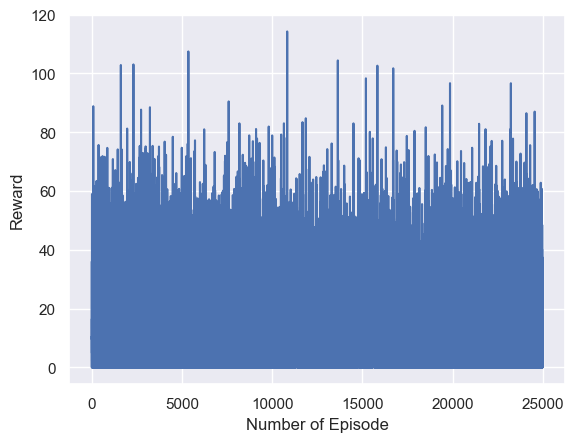

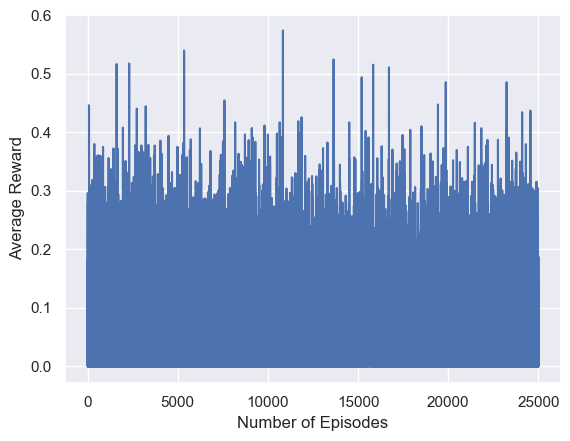

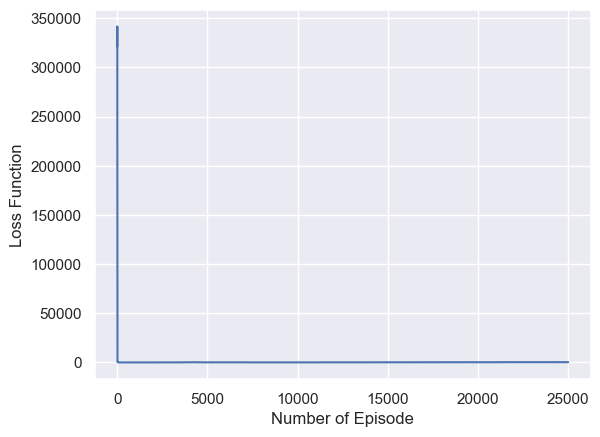

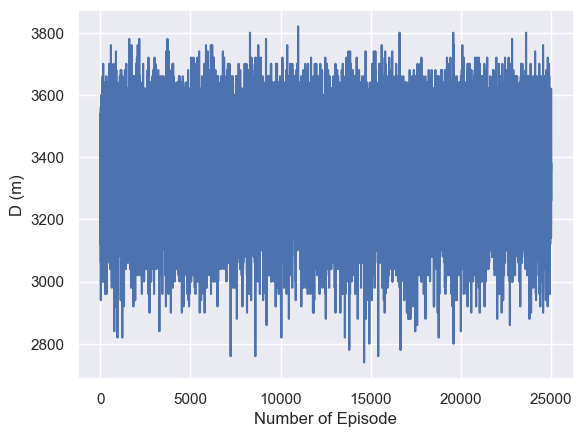

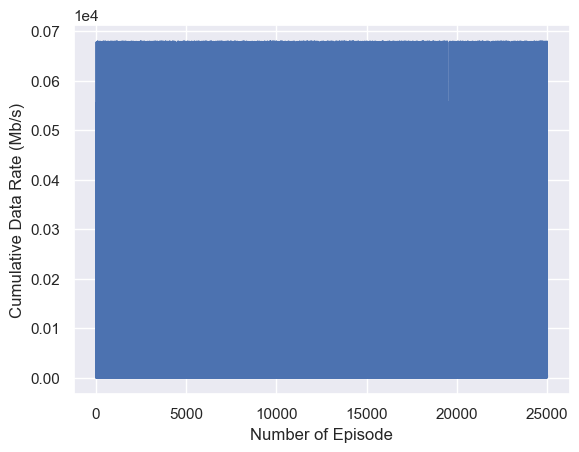

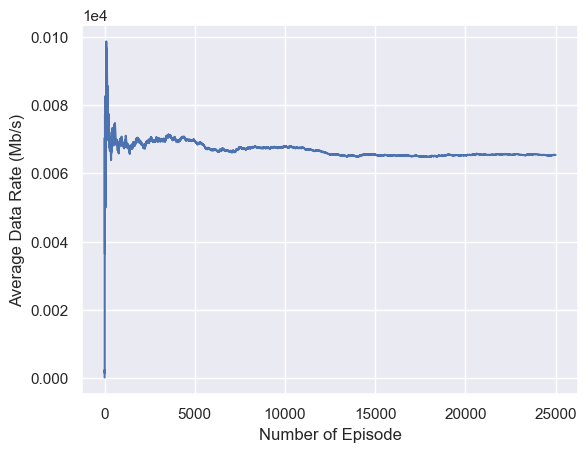

In [4]:
# training the dqn agent
num_episode=25000
step_per_episode=200

# reward
cum_rwd_per_episode=[]
Avg_rwd_per_episode=[]
# loss
losses_per_episode=[]
#energy
#Energy_per_episode=[]
#Avg_energy_training=[]
# data rate
cum_rate_per_episode=[]
Avg_rate_training=[]

Distance=[]
exploration_rate=1
# before it was 1000
#epsilon_decay=3000
#epsilon_decay=0.9998
#Max_epsilon=1
#Min_epsilon=0.01

# saving all location in a array
x_location=[]
y_location=[]
z_location=[]

for i in range (num_episode):
    # reset environment
    state=env.reset()
    #print("state is:" ,state)
    cum_reward=0
    cum_rate=0
    reward_per_action=[]
    #Avg_rate=[]
    losses=0
    done=False
    #epsilon=Max_epsilon
    
    for j in range (step_per_episode-1):
        #print("state is:" ,state)
        
        # action selection
        action=Agent_DQN.choose_action(state,exploration_rate)
        #print("Action is: ",action)
        
        # calculate reward for chosen action
        next_state,reward,done,Data_Rate=env.step(action)
        #print(reward)
        # save transition 
        loss=Agent_DQN.reply_buffer(state,action,reward,next_state,done)
        # sampling for agent training
        #loss=Agent_DQN.sample_buffer()
        if loss is not None:
            losses+=loss
        
        #energy_per_step,sum_energy=env.energy(state,next_state[0:3])
        
        #print("reward,next_state,done,energy: ",reward,next_state,done,energy_per_step)
        #print('========================')
        
        state=next_state
        cum_reward+=reward
        cum_rate=(Data_Rate["Rate"]+Data_Rate["Rate_OMA"])
        reward_per_action.append(reward)
        #Avg_rate.append(Data_Rate["Rate"])
        
        if i==num_episode-1:
            x_location.append(next_state[0])
            y_location.append(next_state[1])
            z_location.append(next_state[2])
         
        if done:
            break

    #exploration_rate *= epsilon_decay
    #exploration_rate= max(exploration_rate,Min_epsilon)
    #exploration_rate = Min_epsilon + (Max_epsilon - Min_epsilon) *  math.exp(-1. * i / epsilon_decay)
        
    # average reward calculation
    Distance.append(Data_Rate["Distance"])
    
    cum_rwd_per_episode.append(cum_reward)
    Avg_rwd_per_episode.append(np.mean(reward_per_action))
    
    losses_per_episode.append(losses)
    
    
    cum_rate_per_episode.append(cum_rate)
    Avg_rate_training.append(np.mean(cum_rate_per_episode))
    
    #Energy_per_episode.append(sum_energy)
    #Avg_energy_training.append(np.mean(Energy_per_episode))
    

    
    # print the training results
    if (i%2==0):
        print('\rEpisode {} \t Reward: {:.2f},\t Loss: {:.2f}'.
               format(i, cum_rwd_per_episode[i], losses_per_episode[i]))
                                                                                         
        #print('\rEpisode {}\tloss: {:.2f}'.format(i, losses[i]))

    # save parameters of main network 
    if i==num_episode-1:
        # create a file to save weights and bias
        FILE="model_parameters.pth"
        torch.save(Agent_DQN.main_network.state_dict(),FILE)

# reward visualization
fig1 = plt.figure()
sns.set()
plt.plot(cum_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')

#norm=[]
#for k in reward_per_episode:
#    k=(k-min(reward_per_episode))/(max(reward_per_episode)-min(reward_per_episode))
#    norm.append(k)
#fig2 = plt.figure()
#sns.set()
#plt.plot(norm)
#plt.xlabel('Number of Episode')
#plt.ylabel('Normalized Reward')

fig2 = plt.figure()
sns.set()
plt.plot(Avg_rwd_per_episode)
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')


# loss visualization
# convert loss values which are tensor values to a list of numpy array
losses_per_episode=[k.detach().numpy() for k in losses_per_episode if k is not None]
fig3=plt.figure()
sns.set()
plt.plot(losses_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Loss Function')

fig4=plt.figure()
sns.set()
plt.plot(Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')



# energy usage visualization
#fig3 = plt.figure()
#sns.set()
#plt.plot(Energy_per_episode)
#plt.xlabel('Number of Episode')
#plt.ylabel('Energy Usage (kJ)')

#fig5 = plt.figure()
#sns.set()
#plt.plot(Avg_energy_training)
#plt.xlabel('Number of Episode')
#plt.ylabel('Average Energy Usage (kJ) ')

# Data rate
fig5 = plt.figure()
sns.set()
plt.plot(cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Cumulative Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

fig6 = plt.figure()
sns.set()
plt.plot(Avg_rate_training)
plt.xlabel('Number of Episode')
plt.ylabel('Average Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


plt.show()

In [5]:
# uav trajectory for last episode
# the reason why uav is jumped to the terminal state is that I appened the destination to the 3 arrays, fix it!
#print(x_location)
#print(y_location)
#print(z_location)
from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('rwd_per_episode_R1.csv', cum_rwd_per_episode, delimiter=',')
savetxt('Avg_rwd_per_episode_R1.csv', Avg_rwd_per_episode, delimiter=',')
savetxt('loss_R1.csv', losses_per_episode, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('cum_rate_per_episode_R1.csv', cum_rate_per_episode, delimiter=',')
savetxt('Distance_R1.csv', Distance, delimiter=',')
sns.set_style("whitegrid")
#env.path_plot(x_location,y_location,z_location)

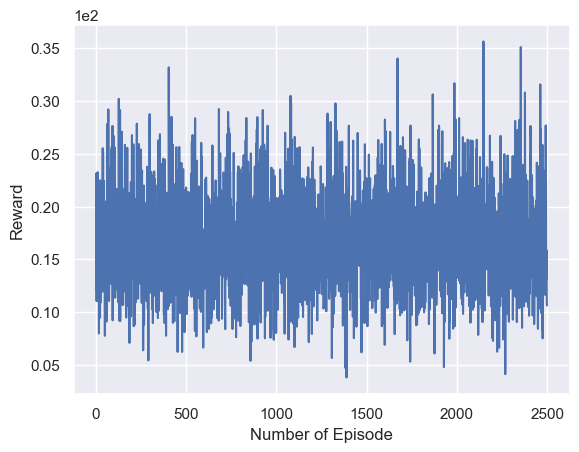

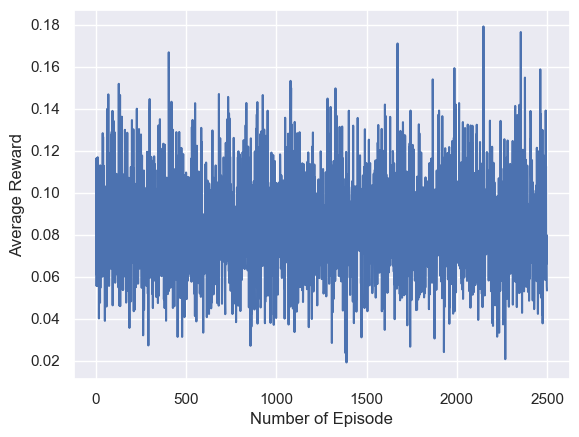

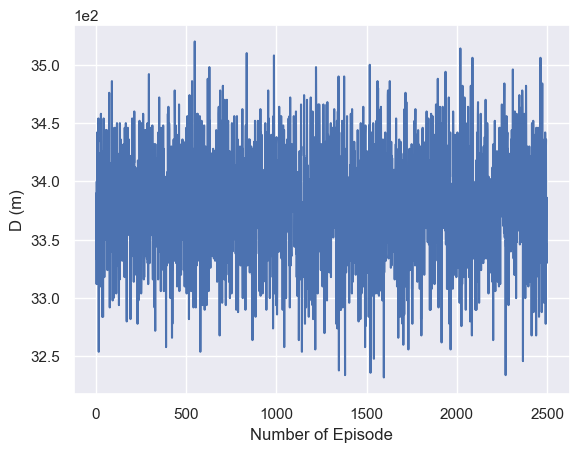

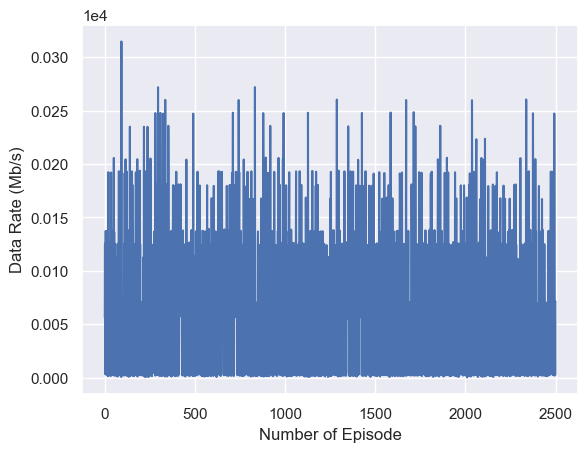

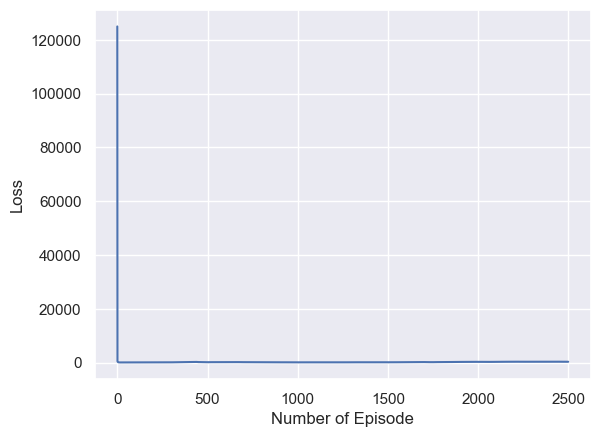

In [6]:
New_rwd_per_episode=[]
for r in range(len(cum_rwd_per_episode)):
        if  r==len(cum_rwd_per_episode)-1:
            samples=np.mean(cum_rwd_per_episode[r-9:])
            #print(samples)
            New_rwd_per_episode.append(samples)
        elif r%10==0 and r!=0:
            samples=np.mean(cum_rwd_per_episode[r-10:r])
            #print(samples)
            New_rwd_per_episode.append(samples)

fig1= plt.figure()
sns.set()
plt.plot(New_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))



New_Avg_rwd_per_episode=[]
for a in range(len(Avg_rwd_per_episode)):
        if  a==len(Avg_rwd_per_episode)-1:
            samples=np.mean(Avg_rwd_per_episode[a-9:])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)
        elif a%10==0 and a!=0:
            samples=np.mean(Avg_rwd_per_episode[a-10:a])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)

fig2= plt.figure()
sns.set()
plt.plot(New_Avg_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Average Reward')


New_Distance=[]
for d in range(len(Distance)):
        if  d==len(Distance)-1:
            samples=np.mean(Distance[d-9:])
            #print(samples)
            New_Distance.append(samples)
        elif d%10==0 and d!=0:
            samples=np.mean(Distance[d-10:d])
            #print(samples)
            New_Distance.append(samples)

fig3= plt.figure()
sns.set()
plt.plot(New_Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

New_cum_rate_per_episode=[]
for b in range(len(cum_rate_per_episode)):
        if  b==len(cum_rate_per_episode)-1:
            samples=np.mean(cum_rate_per_episode[b-9:])
            #print(samples)
            New_cum_rate_per_episode.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(cum_rate_per_episode[b-10:b])
            #print(samples)
            New_cum_rate_per_episode.append(samples)

fig4= plt.figure()
sns.set()
plt.plot(New_cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

New_loss=[]
for b in range(len(losses_per_episode)):
        if  b==len(losses_per_episode)-1:
            samples=np.mean(losses_per_episode[b-9:])
            #print(samples)
            New_loss.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(losses_per_episode[b-10:b])
            #print(samples)
            New_loss.append(samples)

fig5= plt.figure()
sns.set()
plt.plot(New_loss)
plt.xlabel('Number of Episode')
plt.ylabel('Loss')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('New_rwd_per_episode_R1.csv', New_rwd_per_episode, delimiter=',')
savetxt('New_Avg_rwd_per_episode_R1.csv', New_Avg_rwd_per_episode, delimiter=',')
savetxt('New_loss_R1.csv', New_loss, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('New_cum_rate_per_episode_R1.csv', New_cum_rate_per_episode, delimiter=',')
savetxt('New_Distance_R1.csv', New_Distance, delimiter=',')


In [ ]:
# load parameters of saved dqn
Agent_DQN.main_network.load_state_dict(torch.load(FILE))